# Course 3: Advanced Analytics for Organisational Impact

### **Contents**
1. Loading packages, setting functions and initial data loading / cleaning
2. Exploratory analysis of variables and their relationships
3. What are the characteristics of the customer base? [Clustering Analysis]
4. What drivers loyalty points (and spend score)? [MLRs and Decision Tree Analysis]
5. How should we target new potential customers and customers at risk of churn? [Sentiment Analysis]

## Section 1: Loading packages, setting functions and initial data loading / cleaning

### 1.1 Install packages

In [45]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

# Regression and decision tree analysis 
import statsmodels.api as sm
from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.tree import export_text

# For sentiment analysis 
import os
import json
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

### 1.2 Functions necessary for analysis

In [46]:
# Function to define a dataset, group by column(s), then calculate  total number and % per category
def group_total_percent(df, group_col):
    """
    Groups the df by group_col, counts rows per category,
    sorts descending, and calculates percentage of total.

    Parameters:
    - df (pd.DataFrame): input dataset
    - group_col (str): column to group by

    Returns:
    - pd.DataFrame: grouped, sorted DataFrame with 'count' and 'percentage' columns
    """
    grouped = df[group_col].value_counts().reset_index()
    grouped.columns = [group_col, 'count']

    total = grouped['count'].sum()
    grouped['percentage'] = (grouped['count'] / total) * 100

    return grouped

In [47]:
# Function to do basic data exploration for new datasets, as a function in case new data sets are used
def basic_explore(df):
    """
    Basic data exploration of a new dataset using usual functions. 

    Parameters:
    - df (pd.DataFrame): input dataset.

    Returns: 
    - dict containing the shape, dtypes, columns, and head of the dataframe.
    """
    print("Shape:", df.shape, "\n", "\n")
    print("Data types:\n", df.dtypes, "\n", "\n")
    print("Columns:\n", df.columns.tolist(), "\n", "\n")
    print("Head:\n", df.head(), "\n", "\n")
    print("Null Counts\n", df.isnull().sum())

In [48]:
# Function to create a histogram and describe() numerical variables
def variable_explore(df, col):
    """
    Basic exploration of each column with numerical values. 

    Parameters:
    - df (pd.DataFrame): input dataset.
    - col (str): column to explore

    Returns: 
    - histogram of variable
    - basic descriptive statistics
    """
    print(df[col].describe())
    plt.hist(df[col], edgecolor="white")

### 1.3 Load data

In [49]:
# Import and sense-check the actual_duration.csv data
turtle = pd.read_csv('turtle_reviews.csv')

basic_explore(turtle)

Shape: (2000, 11) 
 

Data types:
 gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object 
 

Columns:
 ['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)', 'loyalty_points', 'education', 'language', 'platform', 'product', 'review', 'summary'] 
 

Head:
    gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33 

### 1.4. Data Cleaning

In [50]:
# Drop language and platform columns as all 'EN' and 'Web'
turtle = turtle.drop(['language', 'platform'], axis=1)

turtle.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [51]:
# Rename columns for ease
turtle = turtle.rename(columns={'remuneration (k£)': 'income', 
                                'spending_score (1-100)': 'spend_score'})

turtle.head()

gender  age  income  spend_score  loyalty_points education  product  \
0    Male   18   12.30           39             210  graduate      453   
1    Male   23   12.30           81             524  graduate      466   
2  Female   22   13.12            6              40  graduate      254   
3  Female   25   13.12           77             562  graduate      263   
4  Female   33   13.94           40             366  graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [52]:
# Check gender categories
group_total_percent(turtle, 'gender')

gender  count  percentage
0  Female   1120        56.0
1    Male    880        44.0

In [53]:
# Convert gender into category
turtle['gender'] = turtle['gender'].astype('category')

# Check
group_total_percent(turtle, 'gender')

gender  count  percentage
0  Female   1120        56.0
1    Male    880        44.0

In [54]:
# Check education categories
group_total_percent(turtle, 'education')

education  count  percentage
0      graduate    900        45.0
1           PhD    460        23.0
2  postgraduate    400        20.0
3       diploma    190         9.5
4         Basic     50         2.5

In [55]:
# Rename and combine smaller categories
turtle['education'] = turtle['education'].replace({
    'Basic': 'High-School or less',
    'diploma': 'High-School or less',
    'graduate': 'Graduate',
    'postgraduate': 'Post-Graduate'
})

# Convert to category
turtle['education'] = turtle['education'].astype('category')

# Check 
group_total_percent(turtle, 'education')

education  count  percentage
0             Graduate    900        45.0
1                  PhD    460        23.0
2        Post-Graduate    400        20.0
3  High-School or less    240        12.0

In [56]:
# Check for duplicated rows
turtle.duplicated().sum()

0

### Section 1 Summary

* Data is already very clean: no nulls, no duplicates, seemingly no incorrectly inputted data
* Minor cleaning required, incl. renaming columns, cleaning and converting education into category, converting gender into category
* Dropped language and platform columns as all the same value. Note: worth checking if true with new data. 

## Section 2: Exploratory Analysis

### 2.1 Checking Each Variable

count    2000.000000
mean       39.495000
std        13.573212
min        17.000000
25%        29.000000
50%        38.000000
75%        49.000000
max        72.000000
Name: age, dtype: float64


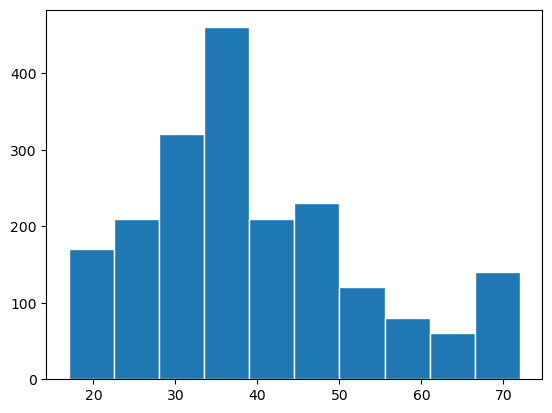

In [57]:
# Explore age
variable_explore(turtle, 'age')

# Skewed to the right, relatively normal distribution until final peak of eldest users
# Min/Max seem sensible

count    2000.000000
mean       48.079060
std        23.123984
min        12.300000
25%        30.340000
50%        47.150000
75%        63.960000
max       112.340000
Name: income, dtype: float64


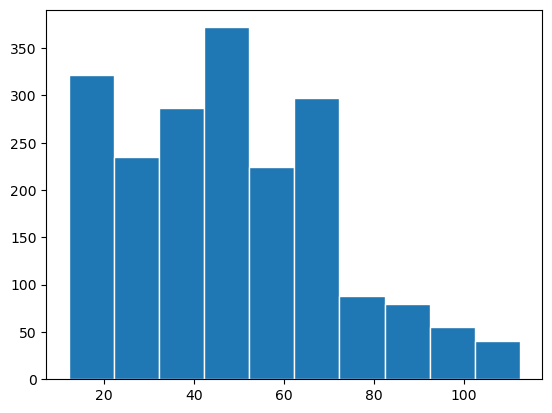

In [58]:
# Explore income
variable_explore(turtle, 'income')

# Heavily skewed to the right with tail of high income earners
# Min/Max seem sensible

count    2000.000000
mean       50.000000
std        26.094702
min         1.000000
25%        32.000000
50%        50.000000
75%        73.000000
max        99.000000
Name: spend_score, dtype: float64


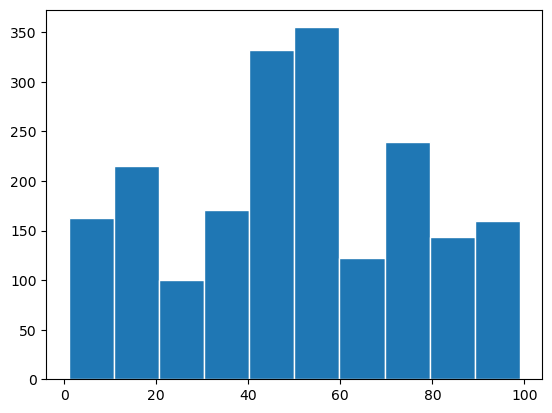

In [59]:
# Explore spend_score
variable_explore(turtle, 'spend_score')

# Not normally distributed, peaks across the dataset
# Scaled from 1-100

count    2000.000000
mean     1578.032000
std      1283.239705
min        25.000000
25%       772.000000
50%      1276.000000
75%      1751.250000
max      6847.000000
Name: loyalty_points, dtype: float64


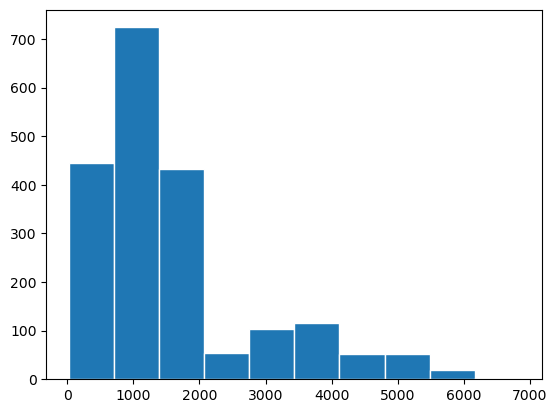

In [60]:
# Explore loyalty_points
variable_explore(turtle, 'loyalty_points')

# Very skewed to the right, large proportion 0-2000 then tailes to ~6,000
# Mix/Max sensible

### 2.2 Relationships between variables

In [61]:
# Correlation between numeric variables
numeric_cols = turtle.select_dtypes(include='number')
numeric_cols.corr()

# Loyalty points have a strong correlation to both income and spend_score
# However, spend has a very low correlation to income 
# Slight negative correlation between age and spend (i.e. younger people spend less)

age    income  spend_score  loyalty_points   product
age             1.000000 -0.005708    -0.224334       -0.042445  0.003081
income         -0.005708  1.000000     0.005612        0.616065  0.305309
spend_score    -0.224334  0.005612     1.000000        0.672310 -0.001649
loyalty_points -0.042445  0.616065     0.672310        1.000000  0.183600
product         0.003081  0.305309    -0.001649        0.183600  1.000000

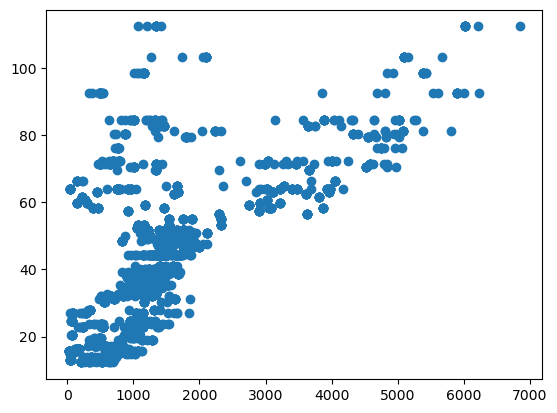

In [62]:
# Visualise the relationship between loyalty_points and income
plt.scatter(turtle['loyalty_points'], turtle['income'])

# Potentially can see different trends emerging within the relationship

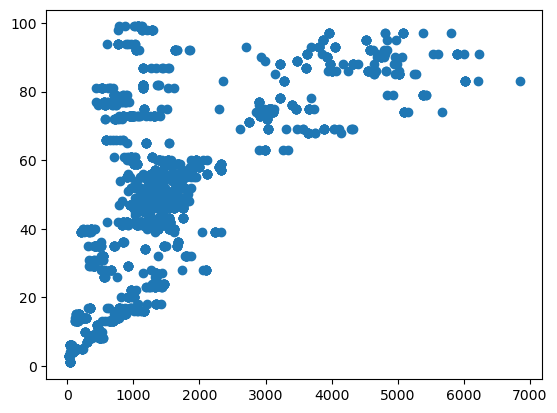

In [63]:
# Visualise the relationship between loyalty_points and income
plt.scatter(turtle['loyalty_points'], turtle['spend_score'])

# Similar to above

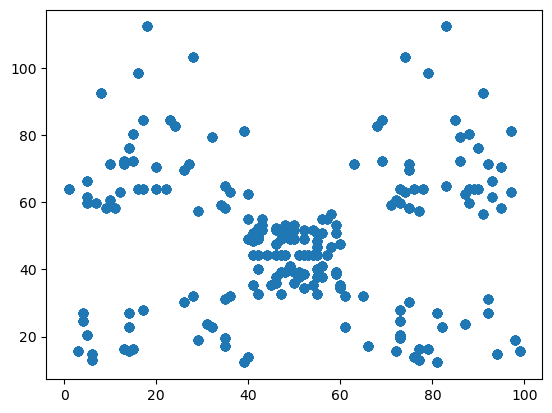

In [64]:
# Visualise the relationship between income and spend_score
plt.scatter(turtle['spend_score'], turtle['income'])

# No trend for whole population but potential emergence of different clusters within relationship.

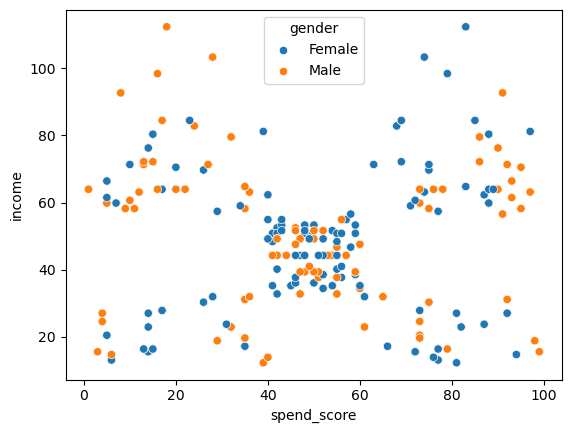

In [65]:
# Looking at role of gender in the above
sns.scatterplot(data=turtle, x='spend_score', y='income', hue='gender')
plt.show()

# No obvious gender split

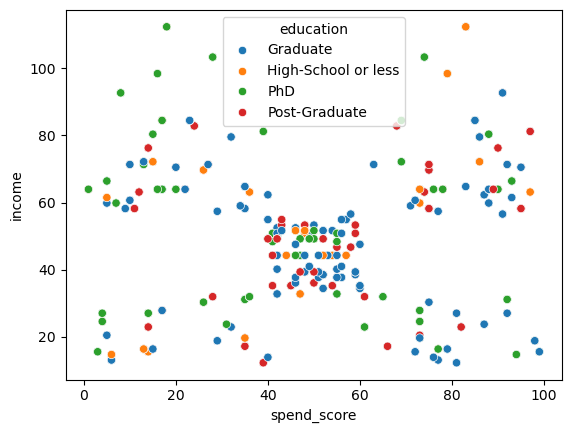

In [66]:
# Looking at role of education in the above
sns.scatterplot(data=turtle, x='spend_score', y='income', hue='education')
plt.show()

# No obvious education split

### Section 2 Summary

* Numerical columns are not normally distributed. Some may need re-scaling for later analysis.
* Strong correlations between loyalty points and income/spend but income and spend are not themselves highly correlated so lower risk of multicollineriaty.
* Potential emerging clusters of customers when looking at spend vs. income. Suggest to use for clustering analysis.

## Section 3: What are the characteristics of the customer base? [Clustering Analysis]

### 3.1 Initial exploration of clusters

<Axes: xlabel='income', ylabel='spend_score'>

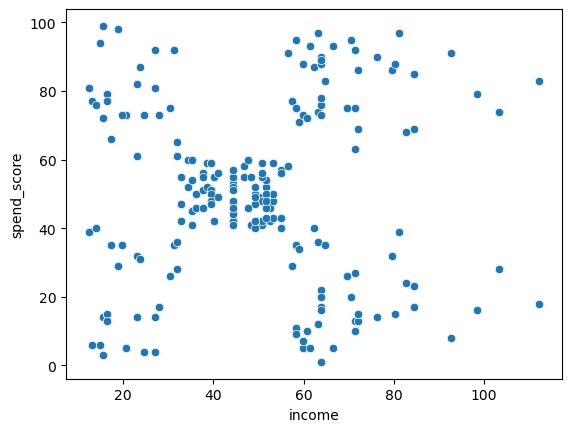

In [166]:
# Visualise the data
sns.scatterplot(x='income', 
                y= 'spend_score', 
                data=turtle)

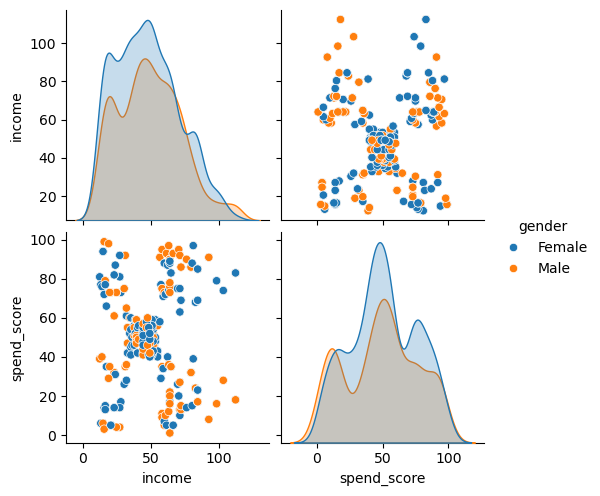

In [167]:
# Creating pairplot with gender
x = turtle[['income', 'spend_score']]

sns.pairplot(turtle, 
             vars=x,
             hue='gender', 
             diag_kind='kde')

# Gender distributions largely the same but generally fewer men

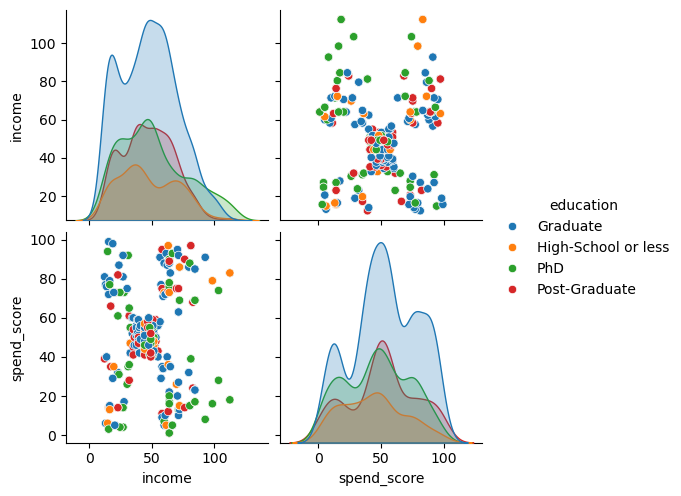

In [168]:
# Creating pairplot with education
x = turtle[['income', 'spend_score']]

sns.pairplot(turtle, 
             vars=x,
             hue='education', 
             diag_kind='kde')

# Education distributions largely the same patterns across categroies (slight difference with lowest education)

### 3.2 Determining the number of clusters appropriate using (1) Elbow method and (2) Silhouette method

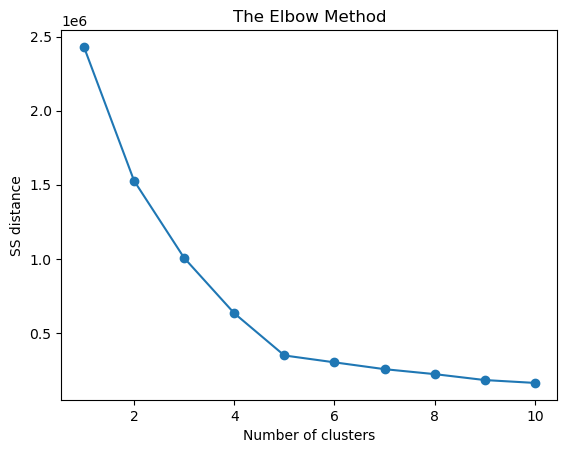

In [169]:
# Elbox method for determining the number of clusters

ss = [] # empty list to store the sum of squares distance

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++', # chooses the first cluster centre at random then picks another further away
                    max_iter=300, # assigns points to  nearest centre, recomputes  centres for 300 times or until centres stop changing
                    n_init=10, # run algorithm 10 times and pick the best
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11),
         ss,
         marker='o')
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

# Initial suggestion of 4-5 clusters, to be compared with Silhouette method

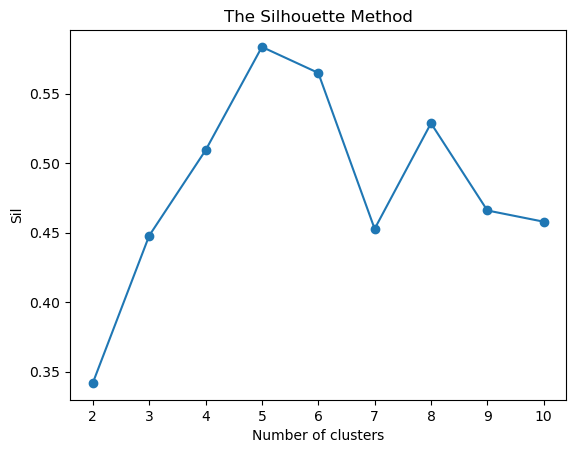

In [170]:
# Silhouette method for determining the number of clusters

sil = [] # empty list to store silhouette scores
kmax = 10 # maximum number of clusters is 10

for k in range(2, kmax+1): # starts at 2 because can't have 1 cluster, then iterates upwards by one each time
    kmeans_s = KMeans(n_clusters=k).fit(x) # runs k-means on data
    labels = kmeans_s.labels_ # after fitting to data, assigns data point to a cluster (each label is a cluster)
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean')) # calculates silhouette score based on how well it fits to cluster

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

Decision: use 5 clusters for analysis based on both the Elbow and Silhouette method.

### 3.3 Clustering Analysis

/var/folders/49/k5d6l_nd5kzdg35hglfrfvhc0000gn/T/ipykernel_1520/330427462.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['K-Means Predicted'] = clusters


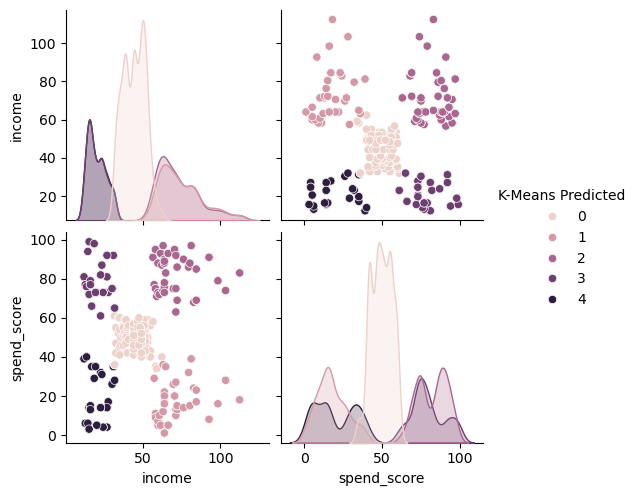

In [171]:
# Clustering analysis based on 5 clusters
kmeans = KMeans(n_clusters = 5, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [172]:
# Check the number of observations per predicted class.
group_total_percent(x, 'K-Means Predicted')

K-Means Predicted  count  percentage
0                  0    774       38.70
1                  2    356       17.80
2                  1    330       16.50
3                  4    271       13.55
4                  3    269       13.45

### 3.4 Investigating the clusters further

In [74]:
# Attach the clusters to the main dataset
turtle_clusters = pd.concat([turtle, x['K-Means Predicted']], axis=1)

turtle_clusters.tail()

gender  age  income  spend_score  loyalty_points education  product  \
1995  Female   37   84.46           69            4031       PhD      977   
1996  Female   43   92.66            8             539       PhD      979   
1997    Male   34   92.66           91            5614  Graduate     1012   
1998    Male   34   98.40           16            1048       PhD     1031   
1999    Male   32   92.66            8             479       PhD      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  K-Means Predicted  
1995  The perfect word game for mixed ages (with Mom                  2  
1996                                       Super fun                  1  
1997                                      Great Game                  2  
1998                                      Four Stars                  1  
1999                                  Love this game                  1

In [75]:
# Check correct assignment against original dataset
x.tail()

income  spend_score  K-Means Predicted
1995   84.46           69                  2
1996   92.66            8                  1
1997   92.66           91                  2
1998   98.40           16                  1
1999   92.66            8                  1

In [76]:
# Save clusters dataset as csv file
turtle_clusters.to_csv("turtle_clusters.csv", index=False)

turtle_clusters.head()

gender  age  income  spend_score  loyalty_points education  product  \
0    Male   18   12.30           39             210  Graduate      453   
1    Male   23   12.30           81             524  Graduate      466   
2  Female   22   13.12            6              40  Graduate      254   
3  Female   25   13.12           77             562  Graduate      263   
4  Female   33   13.94           40             366  Graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  K-Means Predicted  
0  The fact that 50% of this space is wasted on a...                  4  
1  Another worthless Dungeon Master's screen from...                  3  
2                    pretty, but also pretty useless                  4  
3                                         Five Stars                  3  
4                                         Money trap                  4

<Axes: xlabel='loyalty_points', ylabel='K-Means Predicted'>

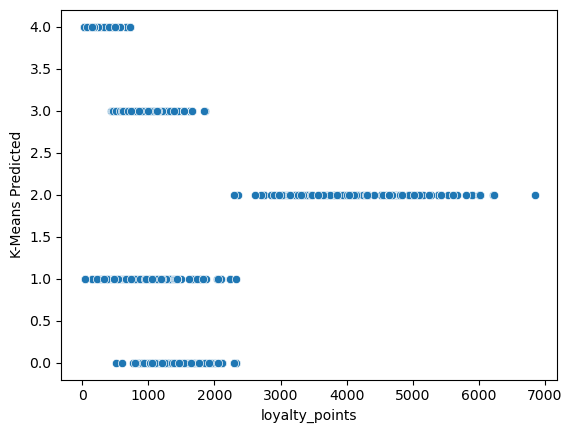

In [77]:
# Clusters vs. loyalty_points
sns.scatterplot(x='loyalty_points' , 
                y ='K-Means Predicted',
                data=turtle_clusters)

<Axes: xlabel='spend_score', ylabel='K-Means Predicted'>

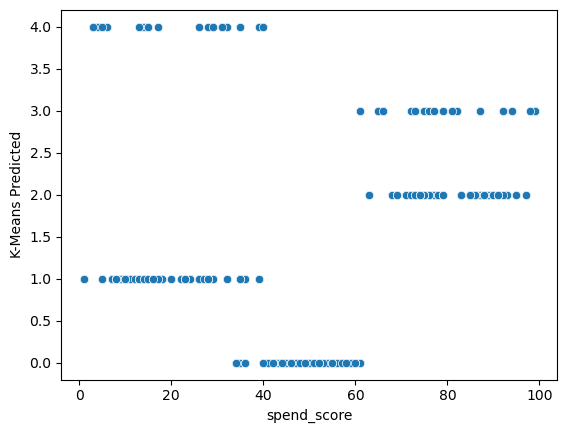

In [78]:
# Clusters vs. spend_score
sns.scatterplot(x='spend_score' , 
                y ='K-Means Predicted',
                data=turtle_clusters)

<Axes: xlabel='age', ylabel='K-Means Predicted'>

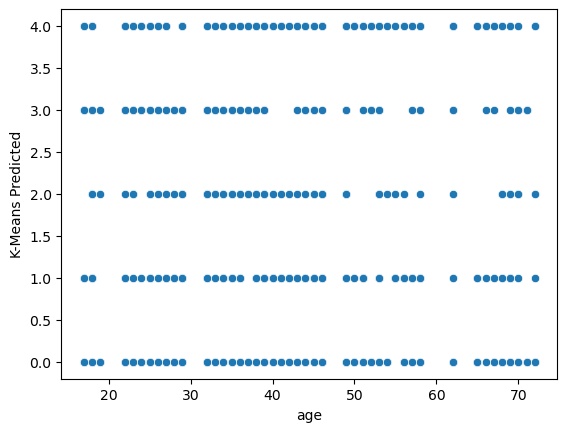

In [79]:
# Clusters vs. age
sns.scatterplot(x='age' , 
                y ='K-Means Predicted',
                data=turtle_clusters)

/var/folders/49/k5d6l_nd5kzdg35hglfrfvhc0000gn/T/ipykernel_1520/2382048377.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(turtle_clusters.groupby(['K-Means Predicted', 'gender']).size().reset_index(name='count'))
/var/folders/49/k5d6l_nd5kzdg35hglfrfvhc0000gn/T/ipykernel_1520/2382048377.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = turtle_clusters.groupby(['gender', 'K-Means Predicted']).size().unstack(fill_value=0)


   K-Means Predicted  gender  count
0                  0  Female    446
1                  0    Male    328
2                  1  Female    157
3                  1    Male    173
4                  2  Female    196
5                  2    Male    160
6                  3  Female    151
7                  3    Male    118
8                  4  Female    170
9                  4    Male    101


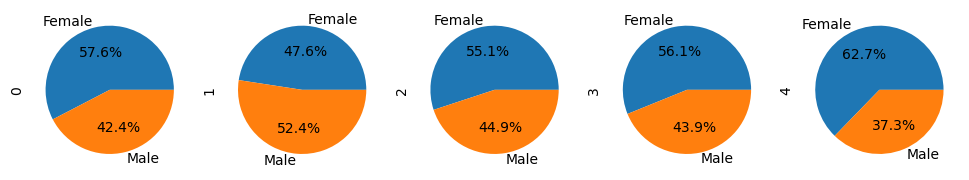

In [80]:
# Clusters vs. gender

# Table
print(turtle_clusters.groupby(['K-Means Predicted', 'gender']).size().reset_index(name='count'))

# Pie charts
counts = turtle_clusters.groupby(['gender', 'K-Means Predicted']).size().unstack(fill_value=0)
counts.plot.pie(
    subplots=True,
    figsize=(6 * counts.shape[0], 6),
    autopct='%1.1f%%',
    legend=False)
plt.show()

/var/folders/49/k5d6l_nd5kzdg35hglfrfvhc0000gn/T/ipykernel_1520/1013353936.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(turtle_clusters.groupby(['K-Means Predicted', 'education']).size().reset_index(name='count'))
/var/folders/49/k5d6l_nd5kzdg35hglfrfvhc0000gn/T/ipykernel_1520/1013353936.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = turtle_clusters.groupby(['education', 'K-Means Predicted']).size().unstack(fill_value=0)


    K-Means Predicted            education  count
0                   0             Graduate    347
1                   0  High-School or less     87
2                   0                  PhD    165
3                   0        Post-Graduate    175
4                   1             Graduate    116
5                   1  High-School or less     44
6                   1                  PhD     98
7                   1        Post-Graduate     72
8                   2             Graduate    190
9                   2  High-School or less     44
10                  2                  PhD     61
11                  2        Post-Graduate     61
12                  3             Graduate    134
13                  3  High-School or less     11
14                  3                  PhD     71
15                  3        Post-Graduate     53
16                  4             Graduate    113
17                  4  High-School or less     54
18                  4                  PhD     65


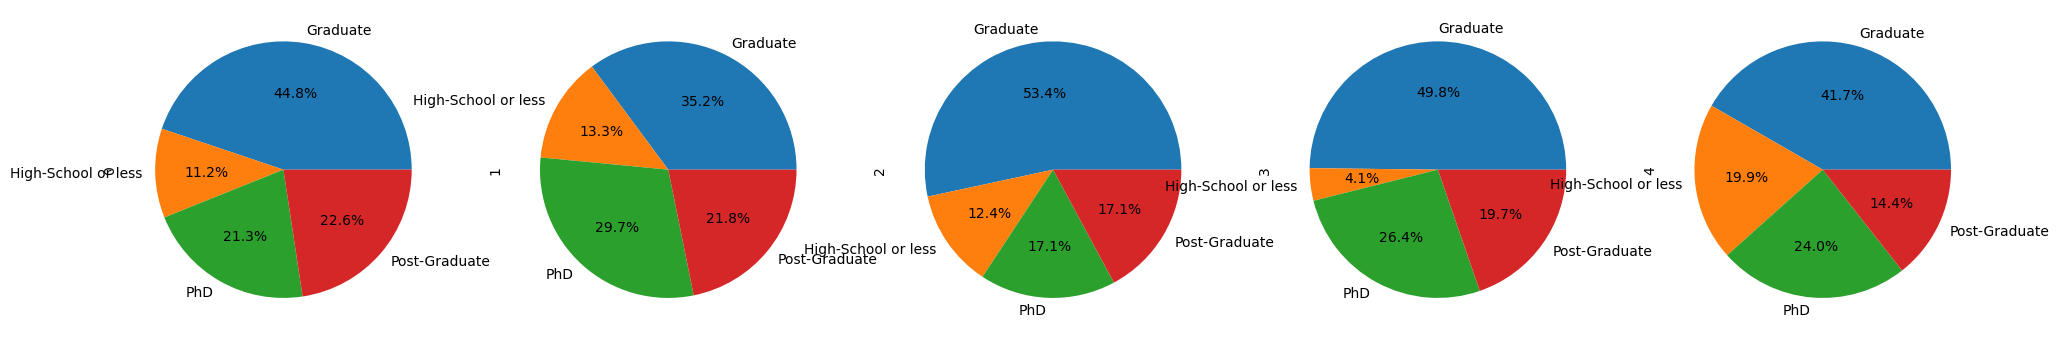

In [81]:
# Clusters vs. education

# Table
print(turtle_clusters.groupby(['K-Means Predicted', 'education']).size().reset_index(name='count'))

# Pie charts
counts = turtle_clusters.groupby(['education', 'K-Means Predicted']).size().unstack(fill_value=0)
counts.plot.pie(
    subplots=True,
    figsize=(6 * counts.shape[0], 6),
    autopct='%1.1f%%',
    legend=False)
plt.show()

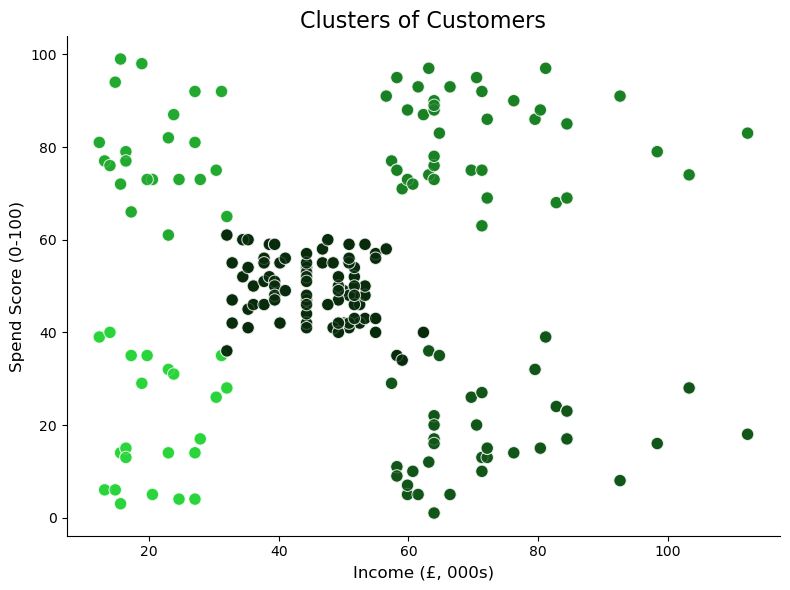

In [82]:
# Visualisation for presentation of clusters based on income vs. spend

# Import the libraries needed to customise colour 
from matplotlib.colors import to_rgb, to_hex
import colorsys

# Function to lighten the base color
def generate_shades(hex_color, n_shades, light_min=0.1, light_max=0.5):
    """
    Generate n shades of a base hex color without going too light.
    light_min/light_max define the lightness range in HLS (0-1)
    """
    r, g, b = to_rgb(hex_color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    # create evenly spaced lightness values in the range
    lightness_values = [light_min + i*(light_max-light_min)/(n_shades-1) for i in range(n_shades)]
    shades = [to_hex(colorsys.hls_to_rgb(h, lv, s)) for lv in lightness_values]
    return shades

# Generate 5 shades
base_color = "#0E4714"
palette = generate_shades(base_color, n_shades=5)

# Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=turtle_clusters,
    x='income',
    y='spend_score',
    hue='K-Means Predicted',
    palette=palette,
    s=80,          
    alpha=0.8,     
    edgecolor='w',
    legend=False
)

plt.title('Clusters of Customers', fontsize=16)
plt.xlabel('Income (£, 000s)', fontsize=12)
plt.ylabel('Spend Score (0-100)', fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

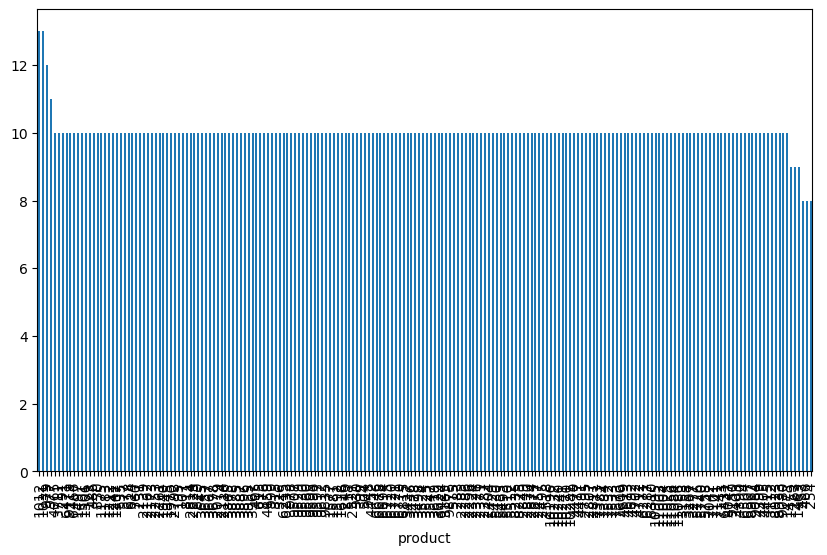

In [212]:
# Check highest product numbers for Group 0 specifically. 

# Filter for just group 0
group0 = turtle_clusters[turtle_clusters['K-Means Predicted']==0]

# Create bar graph of count for each product number

category_counts = turtle_clusters['product'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')

plt.show()

# No major differences in the products bought

### Section 3 Summary: 
* Five distinct groups within customers. 
* Group 0 is largest by far: middle-income and middle-spend group. Groups 1-4 more similar size with high/low income and high/low spend combinations.
* Group 2 (high income, high spend) represent the customers who are the most loyal. They predominantly drive the long tail in the loyalty points from >2000. Understanding more about these customers should direct marketing targeted at new potential customers (i.e. new customers who will spend more and at lower risk of churn).
* Group 1 (high income, low spend) represent customers who could provide the business with additional revenue, but do not represent the same loyalty/spend as Group 2. The risk is that they will churn to another company, and the opportunity is that they could spend more. Understanding the difference between them at Group 2 will should direct marketing towards existing customers.
* Group 0 (mid income, mid spend) are an important group as they make up the bulk of customers. No major action is needed but monitoring should be used to ensure they remain happy and to identify any opportunities to increase spend. Their loyalty points are lower than Group 2, but slightly higher than other groups.
* Group 3 (low income, high spend) have lower loyalty points despite being high spenders. Group 4 (low income, low spend) are less important to the business and pose a risk of churn within the group. Both 3 and 4 make up a smaller proportion of total customers. 

## Section 4: Drivers of loyalty points (and spend) [MLR and Decision Tree Analysis]

### 4.1 OLS Regressions of key variables

In [83]:
# Based on correlations, the main explanation for variance in loyalty_points is spend_score
# So will use for the first OLS model 

# Set y variable
y = turtle['loyalty_points']

# Set x variable (starting with just one now)
x = turtle['spend_score']

# Run the OLS test.
f = 'y ~ x'
test = ols(f, data = turtle).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):          2.92e-263
Time:                        09:03:35   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

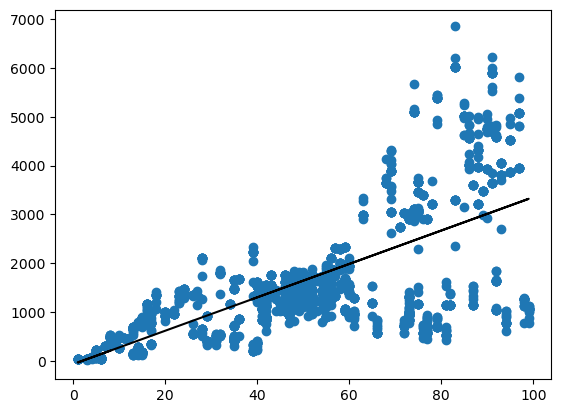

In [84]:
# Create the linear regression
y_pred = -65.6865 + 34.1878 * x

# Plot the data points.
plt.scatter(x, y)

# Plot the line.
plt.plot(x, y_pred, color='black')

> Notes: 
> * Relatively low explanatory power (R^2 is 45%).
> * Spend_score is highly statistically significant showing importance for explanation.
> * Suggests need for additional explanatory variables in regression.
> * However, at high levels of loyalty points (60+) there is a much wider spread in spend_score, leading to much higher errors. 

### 4.2 Multi-linear regression of loyalty points and spend score/income

In [85]:
# Based on correlations, start by adding income to spend_score

# Define the y-variable
y = turtle['loyalty_points']

# Defint the x-variables 
X = turtle[['income', 'spend_score']]

# # Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [86]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.826913470198926
Intercept:  -1700.305097014438
Coefficients:


[('income', 33.97949882180283), ('spend_score', 32.892694687821006)]

In [87]:
# Check for multi-collinearity

# Add a constant.
x_temp = sm.add_constant(X)  

# Create an empty DataFrame. 
vif = pd.DataFrame() 

# Calculate the 'vif' for each value.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, 
                                               i) for i in range(x_temp.values.shape[1])]  


# Create the feature columns.
vif['features'] = x_temp.columns  

# Print the values to two decimal points.
print(vif.round(2))  

   VIF Factor     features
0        8.95        const
1        1.00       income
2        1.00  spend_score


> Notes: 
> * Explanatory power has increased significantly (R^2 now over 82%). This is in line with the clustering analysis - the high income/high spend group had the highest loyalty points.
> * No multi-collinearity between variables.
> * Now test whether adding final variables improves explanatory power at all. 

### 4.3 Multi-linear regression for loyalty points and all variables

In [88]:
# Create education dummies for regression model and drop the first dummy
edu_dummies = pd.get_dummies(turtle['education'], prefix='edu', drop_first=True)

# Check
edu_dummies.head()

edu_High-School or less  edu_PhD  edu_Post-Graduate
0                    False    False              False
1                    False    False              False
2                    False    False              False
3                    False    False              False
4                    False    False              False

In [89]:
# Create new column to map gender as 0 and 1 for regression model 
turtle['gender_num'] = turtle['gender'].map({'Male': 0, 'Female': 1})

# Convert to numeric
turtle['gender_num'] = turtle['gender_num'].astype(float)

# Check
turtle.head()

gender  age  income  spend_score  loyalty_points education  product  \
0    Male   18   12.30           39             210  Graduate      453   
1    Male   23   12.30           81             524  Graduate      466   
2  Female   22   13.12            6              40  Graduate      254   
3  Female   25   13.12           77             562  Graduate      263   
4  Female   33   13.94           40             366  Graduate      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  gender_num  
0  The fact that 50% of this space is wasted on a...         0.0  
1  Another worthless Dungeon Master's screen from...         0.0  
2                    pretty, but also pretty useless         1.0  
3                                         Five Stars         1.0  
4                                         Money trap         1.0

In [117]:
# Define the y variable
y = turtle['loyalty_points']

# Define the x-variables by combining education dummies with x-variables
X = pd.concat([turtle[['spend_score', 'income', 'age', 'gender_num', 'product']], edu_dummies], axis=1)

# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [118]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.8439310008201235
Intercept:  -2206.3201971699636
Coefficients:


[('spend_score', 34.13802496530725),
 ('income', 34.2929569659707),
 ('age', 10.940832921061121),
 ('gender_num', 74.36631586757915),
 ('product', -0.002335836768327937),
 ('edu_High-School or less', 100.403393332464),
 ('edu_PhD', -109.34312428441376),
 ('edu_Post-Graduate', -109.4148768965235)]

> Notes: 
> * Explanatory power not massively increased, (R^2 only increased by 2%).
> * Suggests lower explanatory power of other variables. 

### 4.4 Testing validity of loyalty_points vs. spend/income model using test/train

In [123]:
# Define the y-variable
y = turtle['loyalty_points']

# Defint the x-variables 
X = turtle[['income', 'spend_score']]

# # Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [124]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.3,
                                                                            random_state = 5)

In [125]:
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     3146.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:09:38   Log-Likelihood:                -10756.
No. Observations:                1400   AIC:                         2.152e+04
Df Residuals:                    1397   BIC:                         2.153e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1690.7889     43.409    -38.950      

In [126]:
# Call the predictions for X in the train set.
y_pred_mlr = mlr.predict(X_train)  

# Print the predictions.
print("Prediction for train set: {}".format(y_pred_mlr)) 

Prediction for train set: [ -193.78086017  3400.47347484   690.49783837 ...  1455.481564
 -1001.41152628  1215.97732163]


In [127]:
# Call the predictions for X in the test set.
y_pred_mlr = mlr.predict(X_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_mlr))  

Prediction for test set: [ 1.44351052e+03  3.40278732e+03  1.69699489e+03  1.61612098e+03
  1.05573972e+03  1.18308463e+03  3.43919931e+03  1.05573972e+03
  3.27896171e+03  2.24530805e+03 -1.93780860e+02  5.05916342e+02
  1.32430426e+02  1.21597732e+03  1.28176271e+03  1.42339250e+03
  1.27400920e+02  1.58322828e+03  3.19074445e+03  2.24530805e+03
  1.68190637e+03  2.08547227e+03  1.45548156e+03 -6.49650896e+02
  4.44147048e+03  3.02125147e+03  3.43336617e+03  1.57779696e+03
 -7.10406780e+02  1.59600296e+03  1.46443218e+03  4.24180047e+03
  1.35378305e+03  3.92484456e+03  1.25158568e+03  2.00851947e+03
 -1.05563603e+02  7.21076688e+02  2.16403233e+03  8.39872795e+02
  1.75543692e+03  9.60179115e+02  1.04648434e+03  1.58322828e+03
 -8.39261898e+02  1.51472723e+03  1.22332067e+03  1.68965154e+03
 -1.05713790e+03  1.63392516e+03  1.53675729e+03 -1.07222642e+03
  3.03865383e+03  1.62929747e+03  4.57831319e-01  1.61340532e+03
  1.42882382e+03  1.24504596e+03  1.42922564e+03  3.96548242e+03


In [128]:
# Print the R-squared value.
print(mlr.score(X_test, Y_test)*100)  

84.30122830526972


In [129]:
# Print mean absolute error
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Print mean squared error
print('Mean Squared Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

# Print root mean squared error
print('Root Mean Square Error (Final):', metrics.root_mean_squared_error(Y_test, Y_pred))

Mean Absolute Error (Final): 434.9697592789425
Mean Squared Error (Final): 308333.5522043756
Root Mean Square Error (Final): 555.2779053810584


> Notes: 
> * The MAE is relatively high compared with the scale (in the 000s) and given most loyalty points are clustered under 2000.
> * The MSE and RMSE is really high, showing that there are some very high errors in the model which it is penalising. 

### 4.5 Modelling and testing log(loyalty_points) versus income/spend_score

In [131]:
# Define the y-variable
y = np.log(turtle['loyalty_points'])

# Defint the x-variables 
X = turtle[['income', 'spend_score']]

# # Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [132]:
# Split the data in 'train' (80%) and 'test' (20%) sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size = 0.3,
                                                                            random_state = 5)

In [133]:
# Fit the model with the added constant.
model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(X_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     2721.
Date:                Fri, 10 Oct 2025   Prob (F-statistic):               0.00
Time:                        09:11:01   Log-Likelihood:                -839.63
No. Observations:                1400   AIC:                             1685.
Df Residuals:                    1397   BIC:                             1701.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4914      0.036    123.280      

In [134]:
# Print MAE  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(Y_test, Y_pred))  

# Print MSE
print('Mean Square Error (Final):', metrics.mean_squared_error(Y_test, Y_pred))  

# Print root mean squared error
print('Root Mean Square Error (Final):', metrics.root_mean_squared_error(Y_test, Y_pred))

# Print R-Sqauared
print('R-Squared value', mlr.score(X_test, Y_test)*100)

Mean Absolute Error (Final): 0.36785183676457145
Mean Square Error (Final): 0.24591976846190672
Root Mean Square Error (Final): 0.4959029829128947
R-Squared value 80.4982521073612


> Notes:
> * R^2 is similar to original model.
> * Once converted, MAE and RMSE suggest still high error rate within the model. Predictions are off by about +/-44% on average, and large errors are roughly +/- 64% off.
> * Suggests that multi-linear regressions are not the best predictor of spend score. Likely  because no variable is normally distributed which it is assuming.

### 4.5 Investigating the drivers of spend_score

Spend_score is not a fully independent variable as it is not an independent characteristics of the customer - it is influenced by the business. Therefore, while it is the strongest predictor of loyalty points, it doesn't have explanatory power when looking at potential customers. Understanding the drivers of spend_score will help us to understand which potential (as well as existing) customers will have a high spend and therefore a higher loyalty points.

In [135]:
# Define the y variable
y = turtle['spend_score']

# Define the x-variables by combining education dummies with x-variables
X = pd.concat([turtle[['income', 'age', 'gender_num', 'product']], edu_dummies], axis=1)

# Fit the regression model.
mlr = linear_model.LinearRegression()
mlr.fit(X, y) 

LinearRegression()

In [136]:
# Print the R-squared value.
print("R-squared: ", mlr.score(X,y))  

# Print the intercept.
print("Intercept: ", mlr.intercept_) 

# Print the coefficients.
print("Coefficients:")  

# Map a similar index of multiple containers (to be used as a single entity).
list(zip(X, mlr.coef_))  

R-squared:  0.05884034517614034
Intercept:  67.10983799093921
Coefficients:


[('income', 0.0127580785176882),
 ('age', -0.3976436817911795),
 ('gender_num', 0.5240707135515194),
 ('product', -5.560319180741846e-05),
 ('edu_High-School or less', -5.658065481896989),
 ('edu_PhD', -5.1350859573537715),
 ('edu_Post-Graduate', -1.057521935152474)]

> Notes: 
> * Really low explanatory power of the model (R^2 not even 6%).
> * Suggests that there is not a linear relationship between the characteristics of customers and spend_score.
> * Need to investigate how to better understand the drivers of spend_score using decision trees, which allows for a more segmented approach to customers.

### 4.6 Decision tree analysis of spend_score

In [138]:
# Define the y variable
y = turtle['spend_score']

# Define the x variables
X = pd.concat([turtle[['income', 'age', 'gender_num']], edu_dummies], axis=1)

In [139]:
# Create the test and train datasets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Fit the model with no max depth
tree = DecisionTreeRegressor(random_state=42)

tree = tree.fit(X_train, y_train)

# Predict the response for the test data set.
y_pred = tree.predict(X_test) 

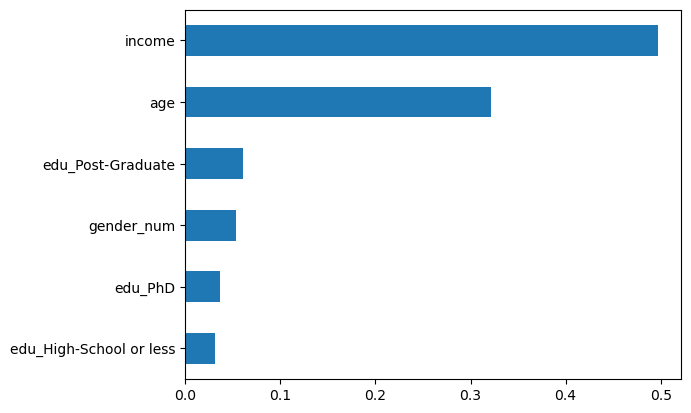

In [140]:
# Visualise the importance of different variables
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh")
plt.show()

In [141]:
# Mean Absolute Error (average absolute difference)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# Mean Squared Error (penalizes large errors more)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (same scale as target)
print("RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

# R^2 Score (variance explained, 1 = perfect prediction)
print("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 9.495762667887668
MSE: 498.98065535603865
RMSE: 22.337874906893866
R^2: 0.27153435598626685


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: >

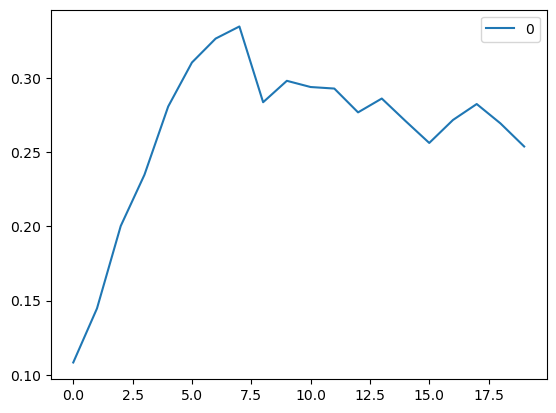

In [142]:
# Determine the optimal value for max depth

# List of values to try for max_depth:
max_depth_range = list(range(1, 21))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    accuracy.append(score)

# Plot accuracy values across the range of depth values evaluated
accuracy = pd.DataFrame(accuracy)
accuracy.plot()

In [143]:
# Create the test and train datasets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model with a max depth of 7, based on the graph above
dtree = DecisionTreeRegressor(random_state=42, max_depth=7)

dtree = dtree.fit(X_train, y_train)

# Predict the response for the test data set.
y_pred = dtree.predict(X_test) 

In [144]:
# Mean Absolute Error (average absolute difference)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# Mean Squared Error (penalizes large errors more)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (same scale as target)
print("RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

# R^2 Score (variance explained, 1 = perfect prediction)
print("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 13.24633719893255
MSE: 461.2868453115535
RMSE: 21.477589373846254
R^2: 0.32656383521486454


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


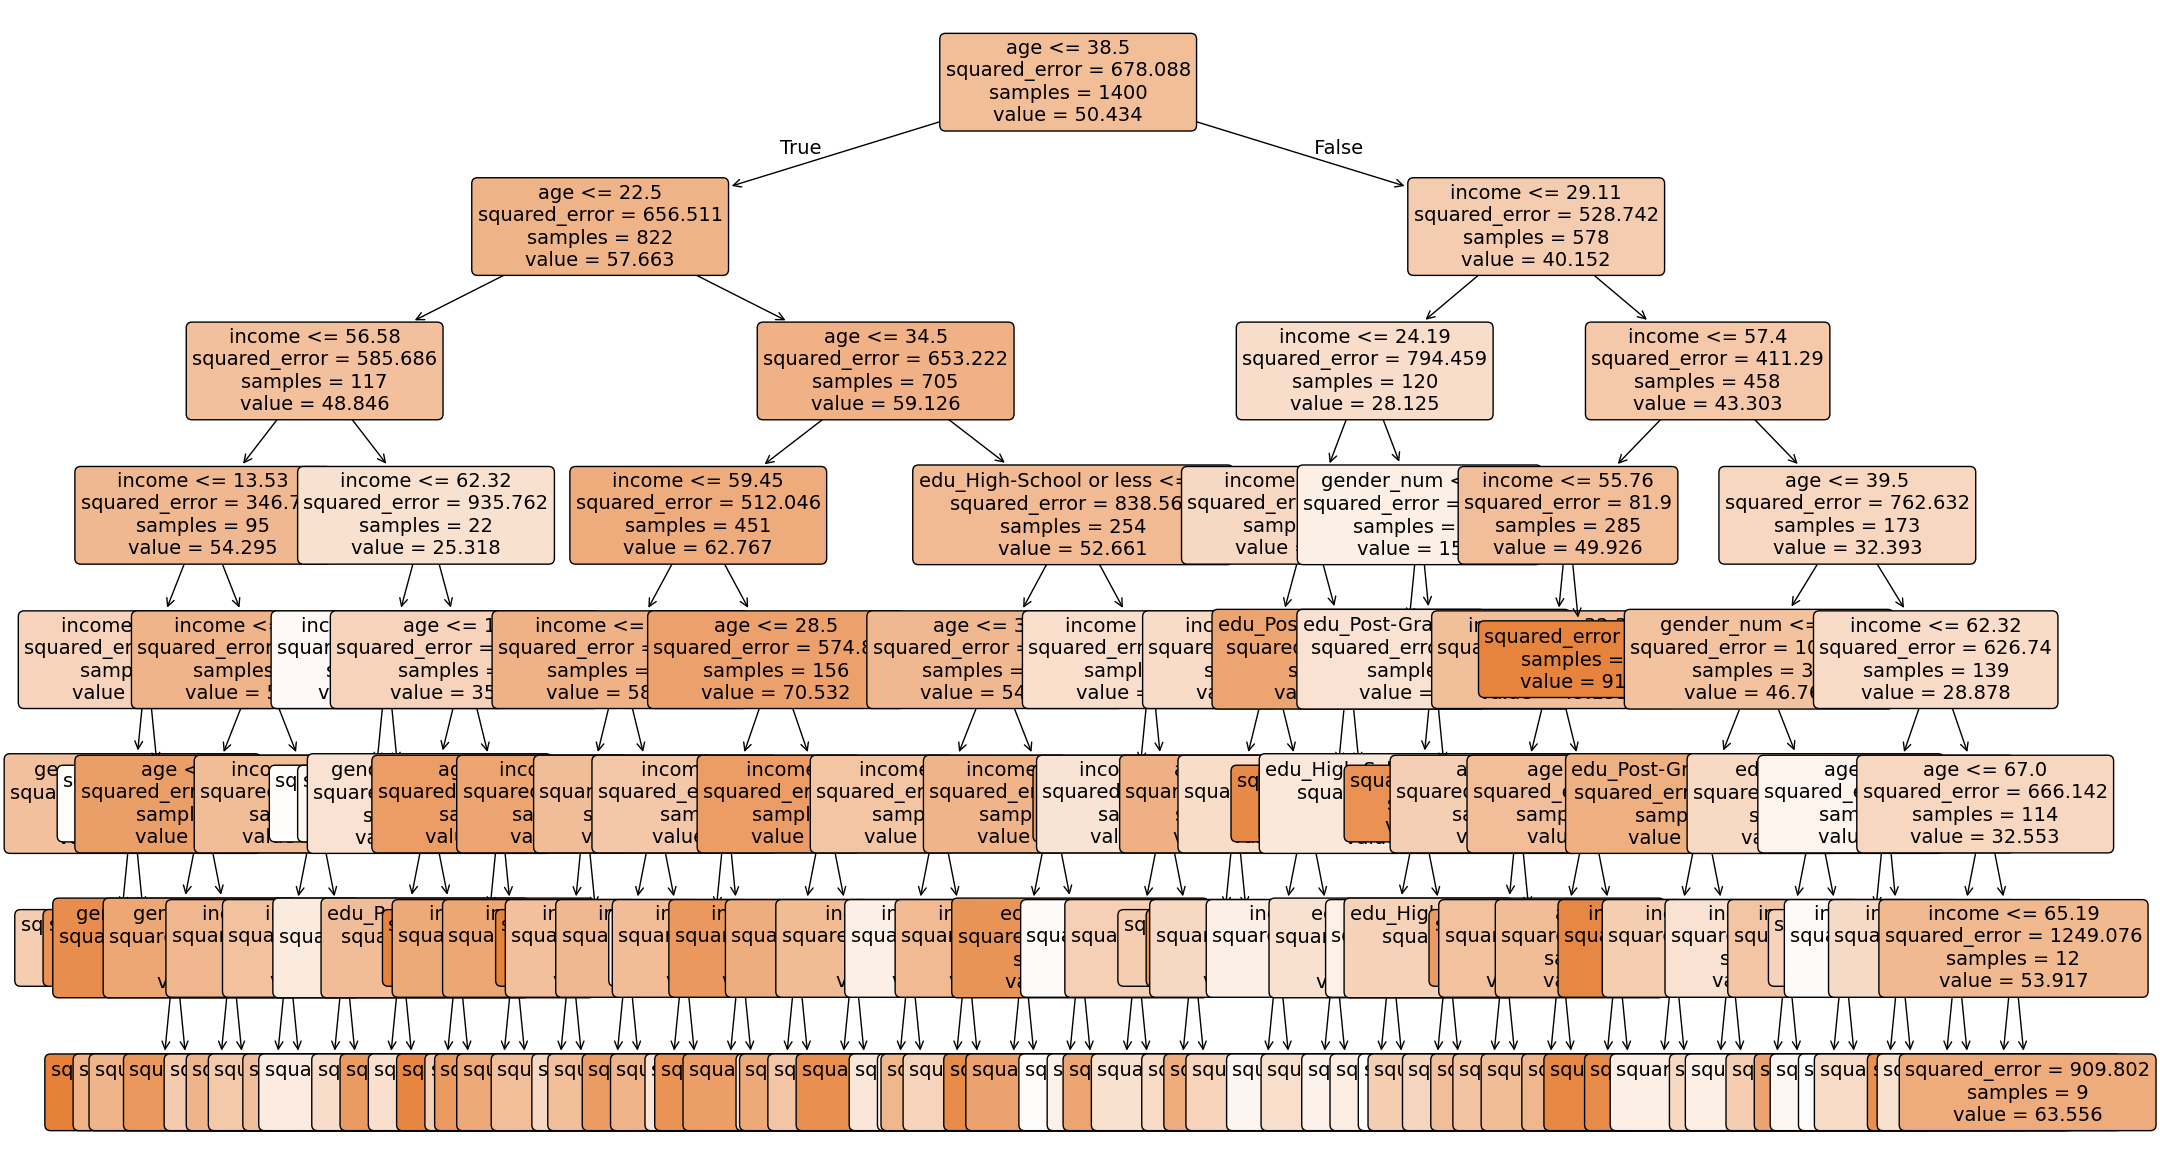

In [145]:
# Plot the decision tree
plt.figure(figsize=(25,15)) 
plot_tree(
    dtree, 
    feature_names=X_train.columns, 
    filled=True, 
    rounded=True, 
    fontsize=14  
)
plt.show()

In [148]:
# Print text representation
from sklearn.tree import export_text

text_representation = export_text(dtree, feature_names=list(X_train.columns))
print(text_representation)

|--- age <= 38.50
|   |--- age <= 22.50
|   |   |--- income <= 56.58
|   |   |   |--- income <= 13.53
|   |   |   |   |--- income <= 12.71
|   |   |   |   |   |--- gender_num <= 0.50
|   |   |   |   |   |   |--- value: [39.00]
|   |   |   |   |   |--- gender_num >  0.50
|   |   |   |   |   |   |--- value: [81.00]
|   |   |   |   |--- income >  12.71
|   |   |   |   |   |--- value: [6.00]
|   |   |   |--- income >  13.53
|   |   |   |   |--- income <= 30.75
|   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |--- gender_num <= 0.50
|   |   |   |   |   |   |   |--- value: [93.33]
|   |   |   |   |   |   |--- gender_num >  0.50
|   |   |   |   |   |   |   |--- value: [58.00]
|   |   |   |   |   |--- age >  18.50
|   |   |   |   |   |   |--- gender_num <= 0.50
|   |   |   |   |   |   |   |--- value: [57.00]
|   |   |   |   |   |   |--- gender_num >  0.50
|   |   |   |   |   |   |   |--- value: [77.25]
|   |   |   |   |--- income >  30.75
|   |   |   |   |   |--- income <= 41.82
|

> Notes:
> * Decision trees have significantly higher predictive power than MLR in this scenario, however it is still not extremely high (R^2 is over 32%). Still a relatively high margin of error (over 13 points) and RMSE suggests that some errors are particularly high (over 22 points). Therefore, conclusions from the decision tree can be used, but cautiously. 
> * Highest value groups (i.e. spend score of over 90): young men, lower income; higher income 18-20s; 20s mid income; older high income.

### 4.6 Decision tree analysis of loyalty_points

Given high margin of error in the MLR for loyalty_points (despite high R^2 value), need to determine whether decision trees are a better predictor. 

In [155]:
# Define the y variable
y = turtle['loyalty_points']

# Define the x variables
X = pd.concat([turtle[['spend_score', 'income', 'age', 'gender_num', 'product']], edu_dummies], axis=1)

In [156]:
# Create the test and train datasets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42)

# Fit the model with no max depth
tree = DecisionTreeRegressor(random_state=42)

tree = tree.fit(X_train, y_train)

# Predict the response for the test data set.
y_pred = tree.predict(X_test) 

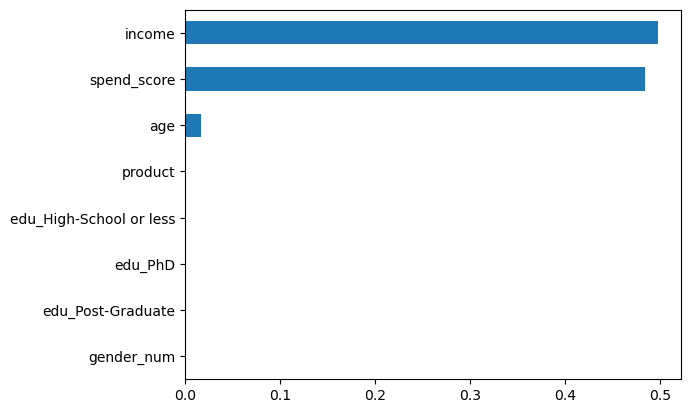

In [157]:
# Visualise the importance of different variables
importances = pd.Series(tree.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh")
plt.show()

In [158]:
# Mean Absolute Error (average absolute difference)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# Mean Squared Error (penalizes large errors more)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (same scale as target)
print("RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

# R^2 Score (variance explained, 1 = perfect prediction)
print("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 36.145
MSE: 10171.648333333333
RMSE: 100.85459004593362
R^2: 0.993720417642411


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<Axes: >

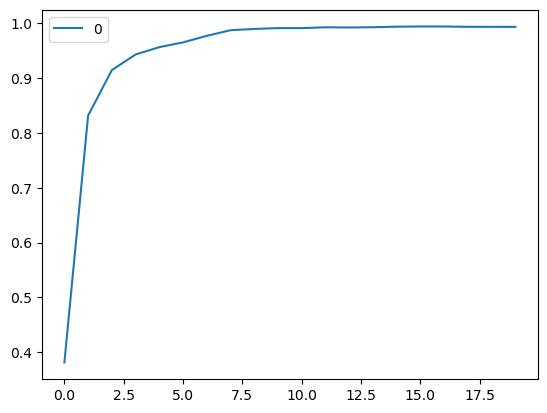

In [159]:
# Determine the optimal value for max depth

# List of values to try for max_depth:
max_depth_range = list(range(1, 21))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    tree = DecisionTreeRegressor(max_depth = depth, random_state = 42)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    accuracy.append(score)

# Plot accuracy values across the range of depth values evaluated
accuracy = pd.DataFrame(accuracy)
accuracy.plot()

In [160]:
# Create the test and train datasets with 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model with a max depth of 2, based on the graph above
dtree = DecisionTreeRegressor(random_state=42, max_depth=2)

dtree = dtree.fit(X_train, y_train)

# Predict the response for the test data set.
y_pred = dtree.predict(X_test) 

In [161]:
# Mean Absolute Error (average absolute difference)
print("MAE:", metrics.mean_absolute_error(y_test, y_pred))

# Mean Squared Error (penalizes large errors more)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error (same scale as target)
print("RMSE:", metrics.mean_squared_error(y_test, y_pred, squared=False))

# R^2 Score (variance explained, 1 = perfect prediction)
print("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 377.185642925765
MSE: 272343.70689986704
RMSE: 521.86560233442
R^2: 0.8318655265101637


/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


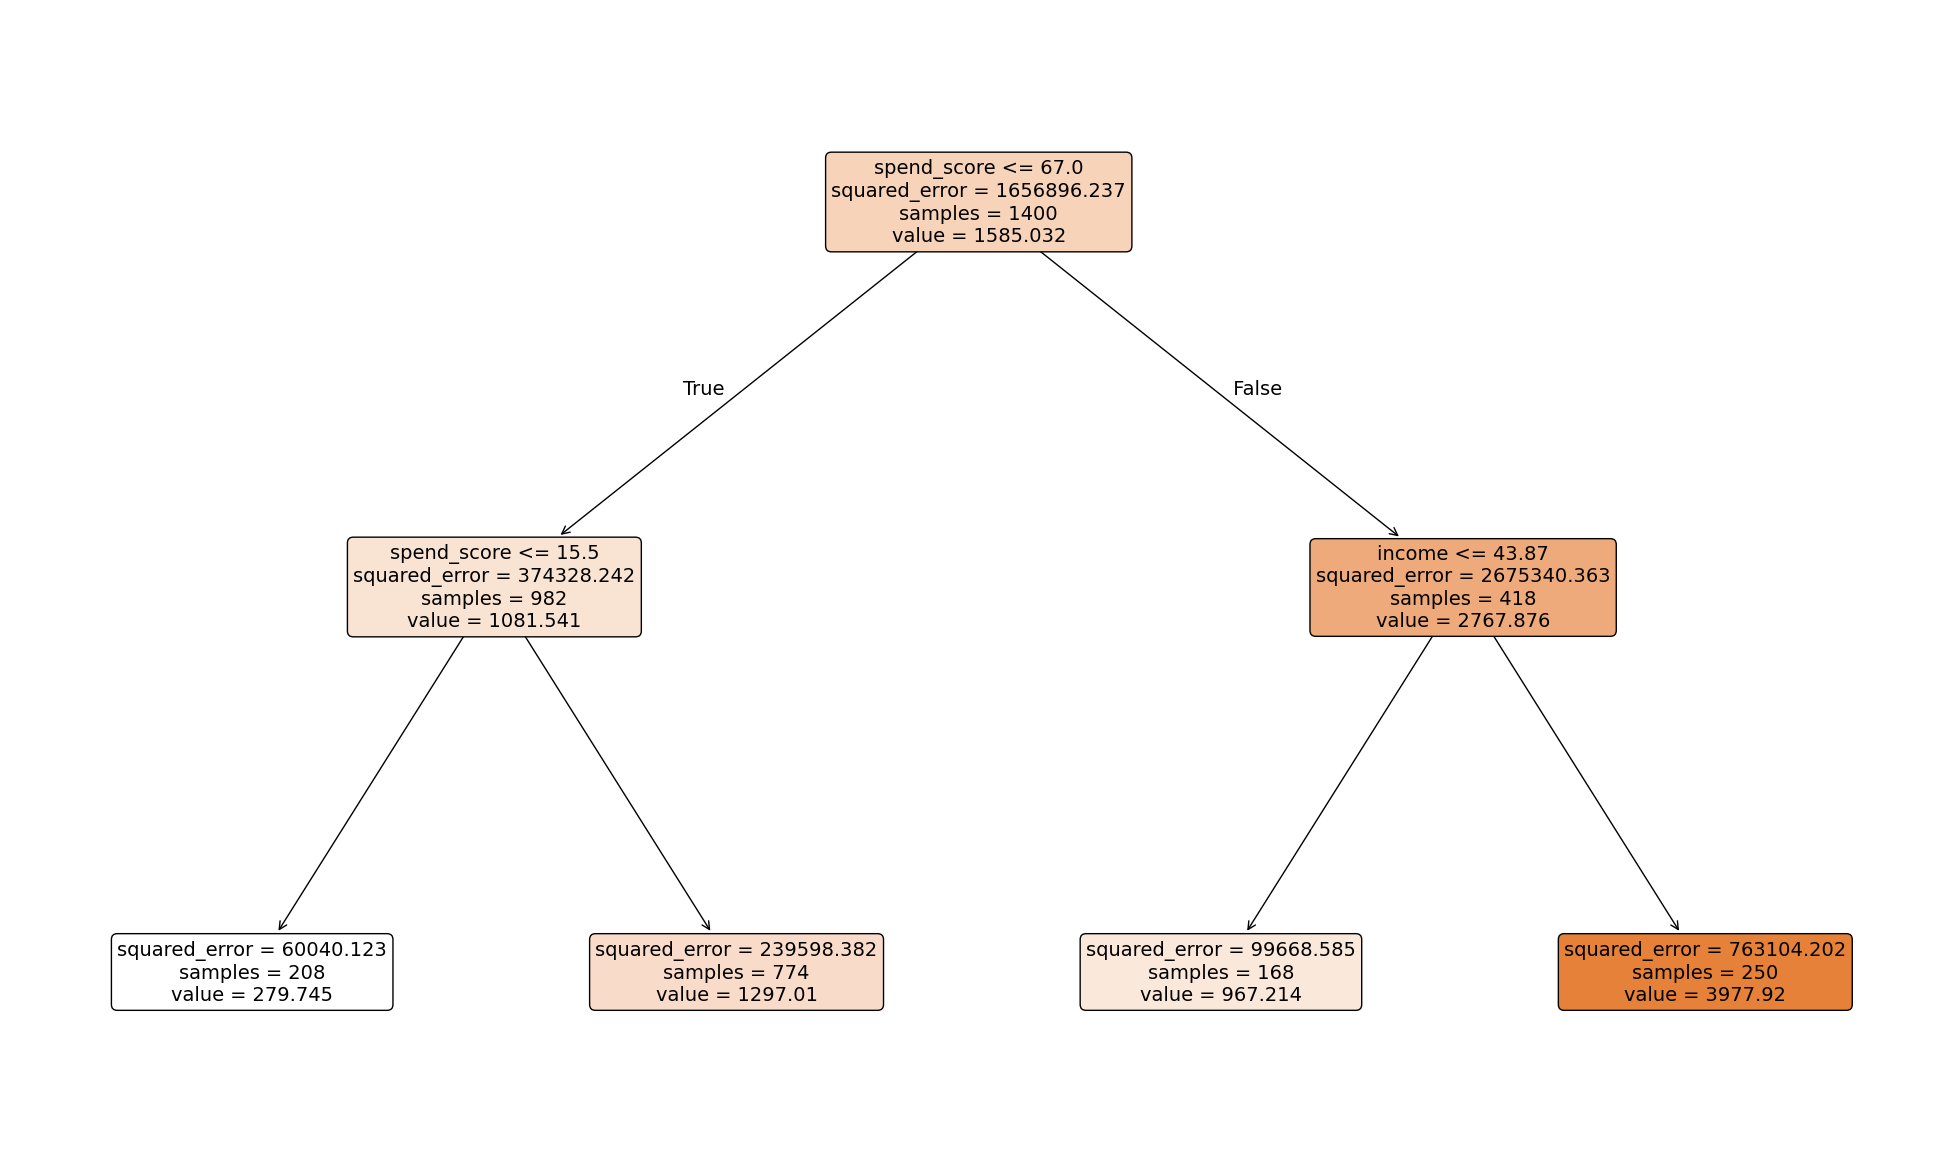

In [162]:
# Plot the decision tree
plt.figure(figsize=(25,15)) 
plot_tree(
    dtree, 
    feature_names=X_train.columns, 
    filled=True, 
    rounded=True, 
    fontsize=14  
)
plt.show()

> Notes:
> * The decision tree validated the chosen variables in the MLR. However, it added more nuance to the analysis - the relationship between spend/income and loyalty points is clearly not linear. The metrics of accuracy improved for the decision tree (but still remained relatively high given the scale of the loyalty points).
> * Decision tree is a simpler model and representation to digest than MLR so will use for presentation.
> * Adding more variables (through more branches of the decision tree) increased the R^2 to 99% however this massively increased the complexity of the model and poses a large risk of overfitting, so was reduced to 2 variables income and spend). Again, this strong relationship between the three variables has been validated by both the clustering and the MLR. 

## Section 5: How should we target new potential customers and customers at risk of churn? [Sentiment Analysis]

### 5.1 Sentiment analysis of total population

In [173]:
# Create an array of the values of the reviews column
reviews = turtle['review'].values

# Check
reviews

array(["When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.",
       'An Open Letter to GaleForce9*:\n\nYour unpainted miniatures are very not bad. Your spell cards are great. Your board games are "meh". Your DM screens, however, are freaking terrible. I\'m still waiting for a single screen that isn\'t polluted with pointless artwork where useful, reference-able tables should be. Once again, you\'ve created a single use screen that is only useful when running the "Storm King\'s Thunder" adventure. Even despite the fact that it\'s geared to that adventure path, it\'s usefulness negligible, at best. I massive swath of the inner pa

In [174]:
# Download the necessary processing packages
nltk.download('stopwords')
nltk.download('words')
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

# Get a list of all english words so we can exclude anything that doesn't appear on the list.
all_english_words = set(words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ginnyrose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/ginnyrose/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [175]:
# Split each comment into individual words
reviews_split = [word_tokenize(i) for i in reviews]

# Check
reviews_split

[['When',
  'it',
  'comes',
  'to',
  'a',
  'DM',
  "'s",
  'screen',
  ',',
  'the',
  'space',
  'on',
  'the',
  'screen',
  'itself',
  'is',
  'at',
  'an',
  'absolute',
  'premium',
  '.',
  'The',
  'fact',
  'that',
  '50',
  '%',
  'of',
  'this',
  'space',
  'is',
  'wasted',
  'on',
  'art',
  '(',
  'and',
  'not',
  'terribly',
  'informative',
  'or',
  'needed',
  'art',
  'as',
  'well',
  ')',
  'makes',
  'it',
  'completely',
  'useless',
  '.',
  'The',
  'only',
  'reason',
  'that',
  'I',
  'gave',
  'it',
  '2',
  'stars',
  'and',
  'not',
  '1',
  'was',
  'that',
  ',',
  'technically',
  'speaking',
  ',',
  'it',
  'can',
  'at',
  'least',
  'still',
  'stand',
  'up',
  'to',
  'block',
  'your',
  'notes',
  'and',
  'dice',
  'rolls',
  '.',
  'Other',
  'than',
  'that',
  ',',
  'it',
  'drops',
  'the',
  'ball',
  'completely',
  '.'],
 ['An',
  'Open',
  'Letter',
  'to',
  'GaleForce9',
  '*',
  ':',
  'Your',
  'unpainted',
  'miniatures',
  

In [176]:
# Remove stop words, ensure all English words and make lower case
reviews_clean = [[y.lower() for y in x if y.lower() not in stop_words 
                  and y.isalpha() 
                  and y.lower() 
                  in all_english_words] 
                 for x in reviews_split]

# Check
reviews_clean

[['comes',
  'screen',
  'space',
  'screen',
  'absolute',
  'premium',
  'fact',
  'space',
  'wasted',
  'art',
  'terribly',
  'informative',
  'art',
  'well',
  'completely',
  'useless',
  'reason',
  'gave',
  'technically',
  'speaking',
  'least',
  'still',
  'stand',
  'block',
  'dice',
  'ball',
  'completely'],
 ['open',
  'letter',
  'unpainted',
  'bad',
  'spell',
  'great',
  'board',
  'however',
  'terrible',
  'still',
  'waiting',
  'single',
  'screen',
  'polluted',
  'pointless',
  'useful',
  'tables',
  'single',
  'use',
  'screen',
  'useful',
  'running',
  'storm',
  'king',
  'thunder',
  'adventure',
  'even',
  'despite',
  'fact',
  'geared',
  'adventure',
  'path',
  'usefulness',
  'negligible',
  'best',
  'massive',
  'swath',
  'inner',
  'panel',
  'wasted',
  'bloated',
  'overland',
  'map',
  'could',
  'easily',
  'reduced',
  'single',
  'panel',
  'size',
  'table',
  'short',
  'stop',
  'making',
  'crap'],
 ['nice',
  'art',
  'nice',

In [177]:
# Create sentiment analyser 
sia = SentimentIntensityAnalyzer()

# Re-join the comments and assign a polarity score
reviews_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in reviews_clean}

# Create a dataframe of the polarity scores
polarity = pd.DataFrame(reviews_polarity).T

# Check
polarity

neg    neu    pos  \
comes screen space screen absolute premium fact...  0.347  0.596  0.057   
open letter unpainted bad spell great board how...  0.218  0.494  0.288   
nice art nice printing two filled general forgo...  0.213  0.557  0.229   
amazing buy bought gift new perfect                 0.000  0.224  0.776   
review previous completely unnecessary nearly u...  0.423  0.577  0.000   
...                                                   ...    ...    ...   
retired find great way stay alert spelling voca...  0.000  0.574  0.426   
perfect word game mixed perhaps giving little h...  0.000  0.355  0.645   
great game think would like first received turn...  0.000  0.532  0.468   
great game mind nimble                              0.000  0.423  0.577   
game fun lot like scrabble without little lose      0.000  0.389  0.611   

                                                    compound  
comes screen space screen absolute premium fact...   -0.8932  
open letter unpainted bad spell great board how...    0.6908  
nice art nice printing two filled general forgo...   -0.1761  
amazing buy bought gift new perfect                   0.8860  
review previous completely unnecessary nearly u...   -0.7063  
...                                                      ...  
retired find great way stay alert spelling voca...    0.8860  
perfect word game mixed perhaps giving little h...    0.9137  
great game think would like first received turn...    0.9062  
great game mind nimble                                0.6249  
game fun lot like scrabble without little lose        0.7809  

[1893 rows x 4 columns]

count    1893.000000
mean        0.630344
std         0.366862
min        -0.930500
25%         0.493900
50%         0.757900
75%         0.895700
max         0.998700
Name: compound, dtype: float64


<Axes: >

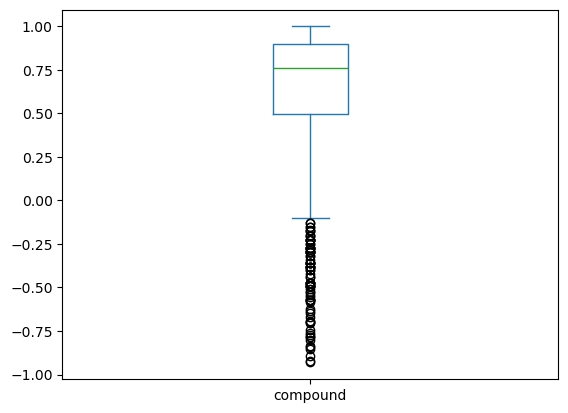

In [178]:
# Describe the polarity scores
print(polarity['compound'].describe())

# View the distribution
polarity_plot = polarity.reset_index()['compound'].sort_values()
polarity_plot.plot(kind='box')

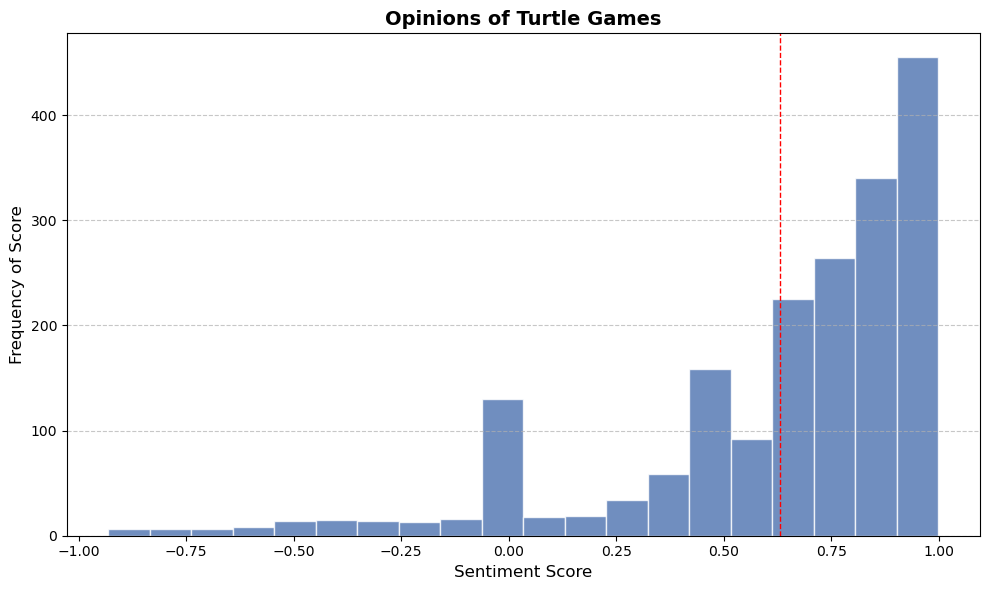

In [179]:
# View the histogram
# Prepare the data
data = polarity['compound']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(data, bins=20, color='#4C72B0', edgecolor='white', alpha=0.8)

# Add title and axis labels
ax.set_title('Opinions of Turtle Games', fontsize=14, weight='bold')
ax.set_xlabel('Sentiment Score', fontsize=12)
ax.set_ylabel('Frequency of Score', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a line for the mean
ax.axvline(x=0.630344, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()
plt.close()

In [180]:
# View the lowest sentiment scores
polarity.sort_values('compound', ascending=1).head(10)

neg    neu    pos  \
one ring innovative set middle earth time lord ...  0.214  0.616  0.170   
review youth occasionally attempt recapture rem...  0.216  0.590  0.193   
comes screen space screen absolute premium fact...  0.347  0.596  0.057   
anger way discuss anger repetitive start get ha...  0.610  0.390  0.000   
work mental health clinician locked facility an...  0.372  0.360  0.268   
high school math teacher ca keep ball desk scho...  0.246  0.597  0.157   
found card game opposite intended actually ways...  0.310  0.457  0.233   
could give egg zero would poorly made hard open...  0.314  0.615  0.071   
cardboard ghost original hard believe shame dis...  0.703  0.138  0.159   
dig shame ago running probably would already se...  0.218  0.717  0.065   

                                                    compound  
one ring innovative set middle earth time lord ...   -0.9305  
review youth occasionally attempt recapture rem...   -0.9230  
comes screen space screen absolute premium fact...   -0.8932  
anger way discuss anger repetitive start get ha...   -0.8555  
work mental health clinician locked facility an...   -0.8434  
high school math teacher ca keep ball desk scho...   -0.8366  
found card game opposite intended actually ways...   -0.8031  
could give egg zero would poorly made hard open...   -0.7845  
cardboard ghost original hard believe shame dis...   -0.7845  
dig shame ago running probably would already se...   -0.7713

In [181]:
# View the highest sentiment scores
polarity.sort_values('compound', ascending=0).head(10)

neg    neu    pos  \
employ one resource rest life make resource bal...  0.031  0.681  0.289   
kit awesome old daughter made dog first came lo...  0.019  0.566  0.414   
disclaimer bought local store list value suppor...  0.054  0.651  0.296   
awesome even bigger better like original game g...  0.082  0.653  0.266   
whenever see game shelf get disturbing visual q...  0.047  0.768  0.185   
middle aged married guy fi video fantasy used p...  0.120  0.586  0.294   
dad two always lookout us together something en...  0.032  0.684  0.284   
wife time apart gaming group thus really play t...  0.105  0.582  0.313   
bought game year old son completely happy since...  0.017  0.483  0.500   
short short version wrath exactly box obvious w...  0.114  0.531  0.356   

                                                    compound  
employ one resource rest life make resource bal...    0.9987  
kit awesome old daughter made dog first came lo...    0.9987  
disclaimer bought local store list value suppor...    0.9985  
awesome even bigger better like original game g...    0.9981  
whenever see game shelf get disturbing visual q...    0.9981  
middle aged married guy fi video fantasy used p...    0.9980  
dad two always lookout us together something en...    0.9971  
wife time apart gaming group thus really play t...    0.9968  
bought game year old son completely happy since...    0.9960  
short short version wrath exactly box obvious w...    0.9954

In [182]:
# Repeat the above but for the summary column to compare for use

# Create an array of the values of the reviews column
summaries = turtle['summary'].values

# Split each comment into individual words
summaries_split = [word_tokenize(i) for i in summaries]

# Remove stop words, ensure all English words and make lower case
summaries_clean = [[y.lower() for y in x if y.lower() not in stop_words 
                  and y.isalpha() 
                  and y.lower() 
                  in all_english_words] 
                 for x in summaries_split]

# Create sentiment analyser 
sia = SentimentIntensityAnalyzer()

# Re-join the comments and assign a polarity score
summaries_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in summaries_clean}

# Create a dataframe of the polarity scores
polarity = pd.DataFrame(summaries_polarity).T

# Check
polarity

neg    neu    pos  compound
fact space wasted art terribly informative art  0.576  0.424  0.000   -0.7783
another worthless dungeon master screen         0.420  0.580  0.000   -0.4404
pretty also pretty useless                      0.275  0.098  0.627    0.5574
five                                            0.000  1.000  0.000    0.0000
money trap                                      0.697  0.303  0.000   -0.3182
...                                               ...    ...    ...       ...
fun card game people like                       0.000  0.341  0.659    0.7003
sort card game equivalent scrabble lot easier   0.000  0.682  0.318    0.4215
great game keep mind active                     0.000  0.306  0.694    0.7783
great mind game                                 0.000  0.328  0.672    0.6249
perfect word game mixed                         0.000  0.448  0.552    0.5719

[1164 rows x 4 columns]

count    1164.000000
mean        0.383677
std         0.339597
min        -0.784500
25%         0.000000
50%         0.493900
75%         0.624900
max         0.952400
Name: compound, dtype: float64


<Axes: >

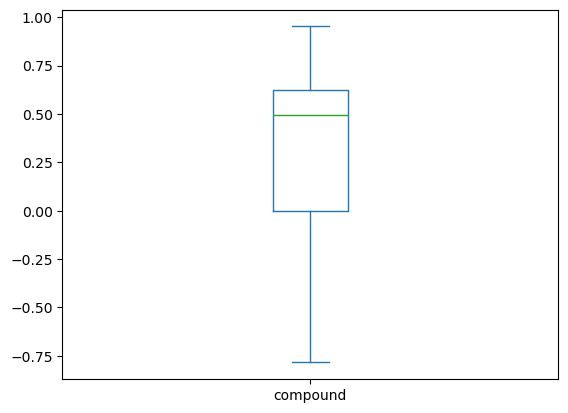

In [183]:
# Describe the polarity scores
print(polarity['compound'].describe())

# View the distribution
polarity_plot = polarity.reset_index()['compound'].sort_values()
polarity_plot.plot(kind='box')

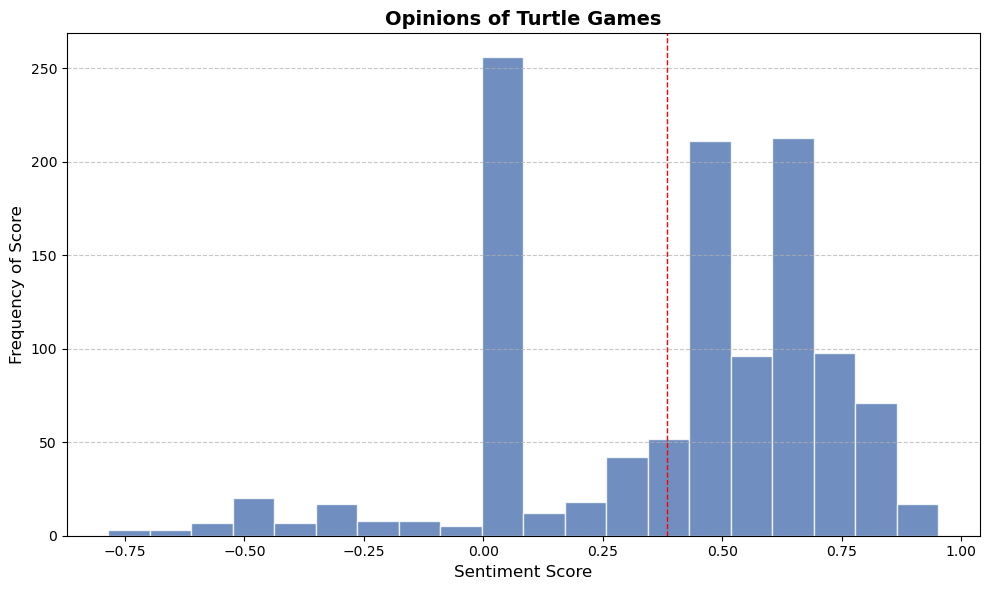

In [184]:
# View the histogram
# Prepare the data
data = polarity['compound']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(data, bins=20, color='#4C72B0', edgecolor='white', alpha=0.8)

# Add title and axis labels
ax.set_title('Opinions of Turtle Games', fontsize=14, weight='bold')
ax.set_xlabel('Sentiment Score', fontsize=12)
ax.set_ylabel('Frequency of Score', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a line for the mean
ax.axvline(x=0.383677, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()
plt.close()

In [185]:
# View the lowest sentiment scores
polarity.sort_values('compound', ascending=1).head(10)

neg    neu    pos  \
cardboard ghost original hard believe shame dis...  0.703  0.138  0.159   
fact space wasted art terribly informative art      0.576  0.424  0.000   
doctor river song amy rory fight every enemy        0.504  0.496  0.000   
find board game dumb boring                         0.651  0.349  0.000   
bad set limited applicability                       0.730  0.270  0.000   
worst quality adult board game even seen            0.406  0.594  0.000   
sided die                                           0.796  0.204  0.000   
amount tension tense fantasy world                  0.610  0.390  0.000   
anger instead teaching                              0.649  0.351  0.000   
anger control game                                  0.649  0.351  0.000   

                                                    compound  
cardboard ghost original hard believe shame dis...   -0.7845  
fact space wasted art terribly informative art       -0.7783  
doctor river song amy rory fight every enemy         -0.7269  
find board game dumb boring                          -0.6808  
bad set limited applicability                        -0.6597  
worst quality adult board game even seen             -0.6249  
sided die                                            -0.5994  
amount tension tense fantasy world                   -0.5719  
anger instead teaching                               -0.5719  
anger control game                                   -0.5719

In [186]:
# View the highest sentiment scores
polarity.sort_values('compound', ascending=0).head(10)

neg    neu    pos  \
wow great set great price great starter set         0.0  0.199  0.801   
easy learn great fun play                           0.0  0.073  0.927   
great great creative                                0.0  0.000  1.000   
great quality cute perfect toddler                  0.0  0.156  0.844   
easy fun fast thoroughly enjoyable well age eight   0.0  0.254  0.746   
great game great value                              0.0  0.086  0.914   
great game value price great also                   0.0  0.221  0.779   
wish buy better luck fairly easy understand plenty  0.0  0.258  0.742   
fun friendly beautiful game                         0.0  0.088  0.912   
useful fun expansion already awesome game           0.0  0.226  0.774   

                                                    compound  
wow great set great price great starter set           0.9524  
easy learn great fun play                             0.9136  
great great creative                                  0.9022  
great quality cute perfect toddler                    0.8957  
easy fun fast thoroughly enjoyable well age eight     0.8950  
great game great value                                0.8910  
great game value price great also                     0.8910  
wish buy better luck fairly easy understand plenty    0.8885  
fun friendly beautiful game                           0.8860  
useful fun expansion already awesome game             0.8834

In [187]:
polarity[polarity['compound']==0].head(10)

neg  neu  pos  compound
five                  0.0  1.0  0.0       0.0
general screen        0.0  1.0  0.0       0.0
fell completely flat  0.0  1.0  0.0       0.0
card                  0.0  1.0  0.0       0.0
enough product        0.0  1.0  0.0       0.0
four                  0.0  1.0  0.0       0.0
three                 0.0  1.0  0.0       0.0
tiny book             0.0  1.0  0.0       0.0
age booker            0.0  1.0  0.0       0.0
sticker premium       0.0  1.0  0.0       0.0

> Notes:
> * Using the summaries leads to a much higher incidence of 'neutral' responses where not enough information is given to provide an assessment of the sentiment of the title.
> * Using reviews leads to a much more positively skewed result and a higher mean, higher distribution and more negative 'outliers'.
> * Would suggest using the full reviews as more information for the analyser to use.

### 5.2 Sentiment analysis of most loyal customers (group 2)

In [188]:
# Filter for just group 2
most_loyal = turtle_clusters[turtle_clusters['K-Means Predicted']==2]

most_loyal.head()

gender  age  income  spend_score  loyalty_points      education  product  \
123    Male   39   56.58           91            3634       Graduate     5510   
125  Female   33   57.40           77            2900       Graduate     8235   
127    Male   38   58.22           95            3866  Post-Graduate     2849   
129    Male   38   58.22           75            3052       Graduate     2874   
131    Male   39   58.22           75            3082  Post-Graduate     2457   

                                                review  \
123  This book is small in size and probably best f...   
125  Nice book but it was so small.  I should have ...   
127  ... In a little package. My 6 year old loved m...   
129  My grandbaby is enjoying creativity with her a...   
131  This is advertised as stickers to build your o...   

                                  summary  K-Means Predicted  
123                        Small sized...                  2  
125                                  Nice                  2  
127                        Lots of fun...                  2  
129  3 year old grand-daughter having fun                  2  
131                     Not as advertised                  2

In [189]:
# Sentiment analysis on the full reviews of group 2

# Create an array of the values of the reviews column
most_loyal_summaries = most_loyal['summary'].values

# Split each comment into individual words
summaries_split = [word_tokenize(i) for i in most_loyal_summaries]

# Remove stop words, ensure all English words and make lower case
summaries_clean = [[y.lower() for y in x if y.lower() not in stop_words 
                  and y.isalpha() 
                  and y.lower() 
                  in all_english_words] 
                 for x in summaries_split]

# Create sentiment analyser 
sia = SentimentIntensityAnalyzer()

# Re-join the comments and assign a polarity score
summaries_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in summaries_clean}

# Create a dataframe of the polarity scores
polarity = pd.DataFrame(summaries_polarity).T

# Check
polarity

neg    neu    pos  compound
small sized                             0.0  1.000  0.000    0.0000
nice                                    0.0  0.000  1.000    0.4215
lots fun                                0.0  0.233  0.767    0.5106
year old fun                            0.0  0.377  0.623    0.5106
                                        0.0  0.000  0.000    0.0000
...                                     ...    ...    ...       ...
word game scrabble everywhere           0.0  1.000  0.000    0.0000
quiddler much fun common instead every  0.0  0.602  0.398    0.5106
great dictionary                        0.0  0.196  0.804    0.6249
gift                                    0.0  0.000  1.000    0.4404
perfect word game mixed                 0.0  0.448  0.552    0.5719

[239 rows x 4 columns]

count    239.000000
mean       0.375486
std        0.323760
min       -0.659700
25%        0.000000
50%        0.458800
75%        0.624900
max        0.891000
Name: compound, dtype: float64


<Axes: >

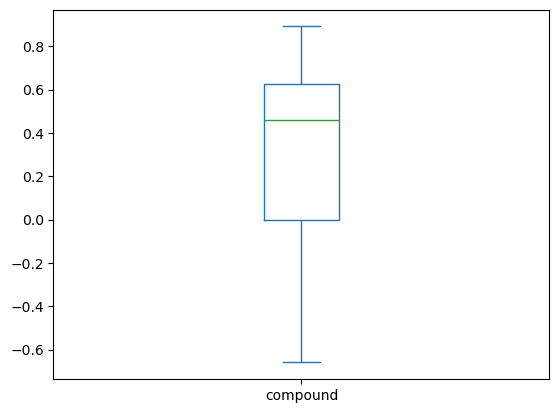

In [190]:
# Describe the polarity scores
print(polarity['compound'].describe())

# View the distribution
polarity_plot = polarity.reset_index()['compound'].sort_values()
polarity_plot.plot(kind='box')

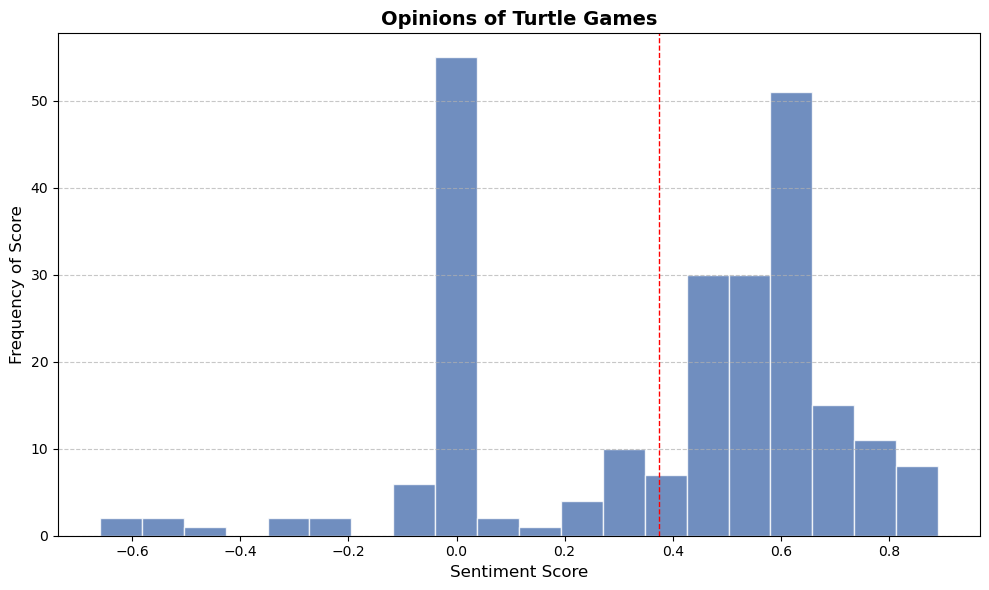

In [191]:
# View the histogram
# Prepare the data
data = polarity['compound']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(data, bins=20, color='#4C72B0', edgecolor='white', alpha=0.8)

# Add title and axis labels
ax.set_title('Opinions of Turtle Games', fontsize=14, weight='bold')
ax.set_xlabel('Sentiment Score', fontsize=12)
ax.set_ylabel('Frequency of Score', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a line for the mean
ax.axvline(x=0.375486, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()
plt.close()

In [192]:
# View the lowest sentiment scores
polarity.sort_values('compound', ascending=1).head(10)

neg    neu   pos  compound
bad set limited applicability         0.730  0.270  0.00   -0.6597
sided die                             0.796  0.204  0.00   -0.5994
anger instead teaching                0.649  0.351  0.00   -0.5719
horrible nothing say would give zero  0.412  0.588  0.00   -0.5423
disappointed                          1.000  0.000  0.00   -0.4767
need yarn hot glue gun                0.375  0.625  0.00   -0.3400
got boring fast                       0.535  0.465  0.00   -0.3182
never play without                    0.504  0.496  0.00   -0.2584
would never play without              0.404  0.596  0.00   -0.2584
made anger management session fun     0.370  0.300  0.33   -0.1027

In [193]:
# Check the neutral reviews
polarity[polarity['compound']==0].head(20)

neg  neu  pos  compound
small sized                     0.0  1.0  0.0       0.0
                                0.0  0.0  0.0       0.0
smaller life                    0.0  1.0  0.0       0.0
robot                           0.0  1.0  0.0       0.0
junk                            0.0  1.0  0.0       0.0
eh                              0.0  1.0  0.0       0.0
two                             0.0  1.0  0.0       0.0
five                            0.0  1.0  0.0       0.0
daughter book                   0.0  1.0  0.0       0.0
box new                         0.0  1.0  0.0       0.0
four                            0.0  1.0  0.0       0.0
incomplete                      0.0  1.0  0.0       0.0
three                           0.0  1.0  0.0       0.0
try recreate                    0.0  1.0  0.0       0.0
niece                           0.0  1.0  0.0       0.0
almost year old                 0.0  1.0  0.0       0.0
new prospective easter message  0.0  1.0  0.0       0.0
toddler                         0.0  1.0  0.0       0.0
floor puzzle                    0.0  1.0  0.0       0.0
small use car                   0.0  1.0  0.0       0.0

In [194]:
# View the highest sentiment scores
polarity.sort_values('compound', ascending=0).head(10)

neg    neu    pos  \
great game value price great also                   0.0  0.221  0.779   
wish buy better luck fairly easy understand plenty  0.0  0.258  0.742   
perfect boss smart toy gift                         0.0  0.177  0.823   
really fun great quality                            0.0  0.201  0.799   
great comic lover                                   0.0  0.112  0.888   
great product darling                               0.0  0.112  0.888   
really love game hope make                          0.0  0.282  0.718   
core game one best honest                           0.0  0.286  0.714   
great fun                                           0.0  0.000  1.000   
best gift ever gave                                 0.0  0.220  0.780   

                                                    compound  
great game value price great also                     0.8910  
wish buy better luck fairly easy understand plenty    0.8885  
perfect boss smart toy gift                           0.8519  
really fun great quality                              0.8390  
great comic lover                                     0.8360  
great product darling                                 0.8360  
really love game hope make                            0.8251  
core game one best honest                             0.8176  
great fun                                             0.8126  
best gift ever gave                                   0.7964

In [195]:
# Extract the most used phrases
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(most_loyal_summaries)
phrase_counts = X.sum(axis=0)

phrases_freq = pd.DataFrame({
    'phrase': vectorizer.get_feature_names_out(),
    'count': phrase_counts.A1
}).sort_values(by='count', ascending=False)

# Top 10 most used phrases
print(phrases_freq.head(10))

              phrase  count
257       great game      9
325  lords waterdeep      8
549         year old      3
130     easter story      3
228       good price      3
30       ball whacks      3
305        kids love      3
330        love game      3
333    love stickers      2
338   loved stickers      2


In [196]:
# Extract the most used words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(most_loyal_summaries)
word_counts = X.sum(axis=0)

words_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': word_counts.A1
}).sort_values(by='count', ascending=False)

# Top 10 most used words
print(words_freq.head(10)) 

          word  count
362      stars     87
183      great     48
164       game     42
163        fun     33
176       good     19
241       love     18
222       kids     11
416  waterdeep     10
365   stickers      9
137  expansion      9


> Notes:
> * The most loyal customers had a slightly less positive sentiment distribution and a lower mean (0.37 vs 0.63) for total population. Also had a higher number of netural sentiment reviews.
> * However distribution is predominantly either neutral or positive with a long negative tail (less than 25% of distribution). 
> * Suggests that despite being loyal, some customers are unhappy with the products. However, most provide a positive sentiment which suggests a low rate of churn.
> * Looking at the neutral reviews, it is typically because there is insufficient information. Some include numbers which could suggest the number of stars they would provide it (but further investigation would be needed to verify this). 

### 5.3 Sentiment analysis of high potential spend but risk of churn due to low loyalty (group 1)

In [197]:
# Filter for just group 1
churn_risk = turtle_clusters[turtle_clusters['K-Means Predicted']==1]

churn_risk.head()

gender  age  income  spend_score  loyalty_points      education  product  \
124  Female   25   57.40           29             926       Graduate     5512   
128    Male   58   58.22           11             463  Post-Graduate     2870   
130    Male   45   58.22            9             385       Graduate     2877   
134    Male   22   59.86            5             152       Graduate    10196   
136  Female   42   59.86            7             303            PhD    10240   

                                                review  \
124  got it for my 8 year old but it was very small...   
128  love this little book for an extra little fun ...   
130  It is a fun little book for those of you that ...   
134  This occupied my almost-3 year old for nearly ...   
136  Was not what I expected...not enough to do. Sh...   

                              summary  K-Means Predicted  
124                            its ok                  1  
128                   fun cheap silly                  1  
130                    Small and fun!                  1  
134           Perfect for Preschooler                  1  
136  Should be free with purchase....                  1

In [198]:
# Sentiment analysis on the full reviews of group 1

# Create an array of the values of the reviews column
churn_risk_summaries = churn_risk['summary'].values

# Split each comment into individual words
summaries_split = [word_tokenize(i) for i in churn_risk_summaries]

# Remove stop words, ensure all English words and make lower case
summaries_clean = [[y.lower() for y in x if y.lower() not in stop_words 
                  and y.isalpha() 
                  and y.lower() 
                  in all_english_words] 
                 for x in summaries_split]

# Create sentiment analyser 
sia = SentimentIntensityAnalyzer()

# Re-join the comments and assign a polarity score
summaries_polarity = {" ".join(_) : sia.polarity_scores(" ".join(_)) for _ in summaries_clean}

# Create a dataframe of the polarity scores
polarity = pd.DataFrame(summaries_polarity).T

# Check
polarity

neg    neu    pos  compound
                                       0.0  0.000  0.000    0.0000
fun cheap silly                        0.0  0.185  0.815    0.5267
small fun                              0.0  0.233  0.767    0.5106
perfect                                0.0  0.000  1.000    0.5719
free purchase                          0.0  0.233  0.767    0.5106
...                                    ...    ...    ...       ...
well done useful                       0.0  0.167  0.833    0.6124
easily learned word game great addict  0.0  0.381  0.619    0.7579
great scrabble group                   0.0  0.328  0.672    0.6249
great game keep mind active            0.0  0.306  0.694    0.7783
great mind game                        0.0  0.328  0.672    0.6249

[219 rows x 4 columns]

count    219.000000
mean       0.378799
std        0.326159
min       -0.726900
25%        0.000000
50%        0.458800
75%        0.624900
max        0.902200
Name: compound, dtype: float64


<Axes: >

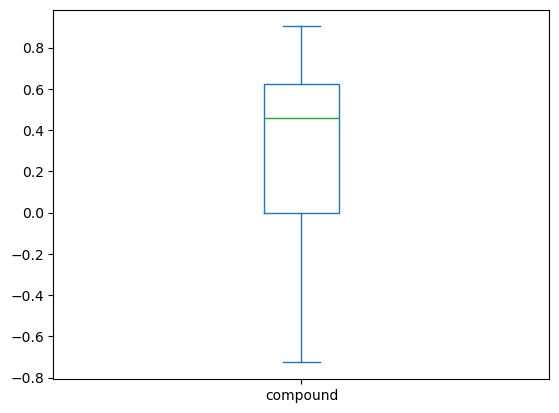

In [199]:
# Describe the polarity scores
print(polarity['compound'].describe())

# View the distribution
polarity_plot = polarity.reset_index()['compound'].sort_values()
polarity_plot.plot(kind='box')

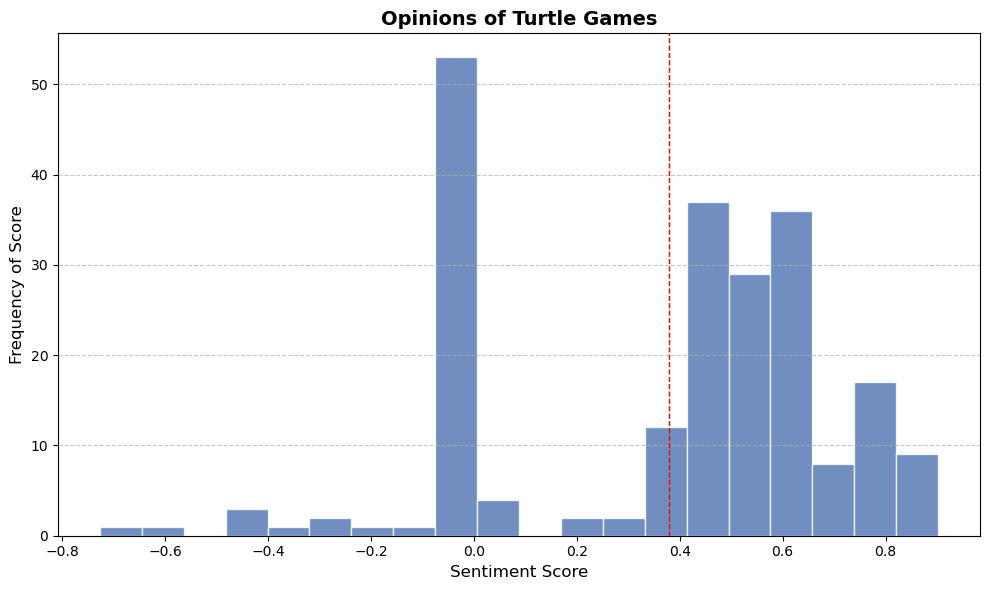

In [200]:
# View the histogram
# Prepare the data
data = polarity['compound']

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(data, bins=20, color='#4C72B0', edgecolor='white', alpha=0.8)

# Add title and axis labels
ax.set_title('Opinions of Turtle Games', fontsize=14, weight='bold')
ax.set_xlabel('Sentiment Score', fontsize=12)
ax.set_ylabel('Frequency of Score', fontsize=12)

# Add gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a line for the mean
ax.axvline(x=0.378799, color='red', linestyle='--', linewidth=1)

# Show the plot
plt.tight_layout()
plt.show()
plt.close()

In [201]:
# View the lowest sentiment scores
polarity.sort_values('compound', ascending=1).head(10)

neg    neu  pos  compound
doctor river song amy rory fight every enemy  0.504  0.496  0.0   -0.7269
anger control game                            0.649  0.351  0.0   -0.5719
poor                                          1.000  0.000  0.0   -0.4767
disappointed enough yarn complete             0.508  0.492  0.0   -0.4767
disappointed                                  1.000  0.000  0.0   -0.4767
age found difficult make                      0.455  0.545  0.0   -0.3612
faulty product                                0.697  0.303  0.0   -0.3182
nothing like photo                            0.513  0.487  0.0   -0.2755
almost never play without expansion           0.305  0.695  0.0   -0.1920
hard yr old                                   0.412  0.588  0.0   -0.1027

In [202]:
# Check the neutral reviews
polarity[polarity['compound']==0].head(20)

neg  neu  pos  compound
                                         0.0  0.0  0.0       0.0
five year old grandson wife              0.0  1.0  0.0       0.0
five                                     0.0  1.0  0.0       0.0
always able draw saw                     0.0  1.0  0.0       0.0
incomplete kit                           0.0  1.0  0.0       0.0
four                                     0.0  1.0  0.0       0.0
lot patience                             0.0  1.0  0.0       0.0
granddaughter took along vacation        0.0  1.0  0.0       0.0
pom                                      0.0  1.0  0.0       0.0
locked facility                          0.0  1.0  0.0       0.0
decent game therapy                      0.0  1.0  0.0       0.0
recreational therapist                   0.0  1.0  0.0       0.0
smallish                                 0.0  1.0  0.0       0.0
durable                                  0.0  1.0  0.0       0.0
smaller duckling                         0.0  1.0  0.0       0.0
one star                                 0.0  1.0  0.0       0.0
smaller twice price                      0.0  1.0  0.0       0.0
given star afar ago tradition family ce  0.0  1.0  0.0       0.0
star afar much                           0.0  1.0  0.0       0.0
job                                      0.0  1.0  0.0       0.0

In [203]:
# View the highest sentiment scores
polarity.sort_values('compound', ascending=0).head(10)

neg    neu    pos  \
great great creative                                0.0  0.000  1.000   
good fun well made stays interesting                0.0  0.154  0.846   
great puzzle love                                   0.0  0.108  0.892   
fun intellectual toy creativity workshop            0.0  0.179  0.821   
awesome great game system                           0.0  0.196  0.804   
great addition great game                           0.0  0.196  0.804   
great expansion great game                          0.0  0.196  0.804   
great already great game                            0.0  0.196  0.804   
cubicle made another excellent game worth money...  0.0  0.360  0.640   
super fun                                           0.0  0.000  1.000   

                                                    compound  
great great creative                                  0.9022  
good fun well made stays interesting                  0.8750  
great puzzle love                                     0.8519  
fun intellectual toy creativity workshop              0.8481  
awesome great game system                             0.8481  
great addition great game                             0.8481  
great expansion great game                            0.8481  
great already great game                              0.8481  
cubicle made another excellent game worth money...    0.8360  
super fun                                             0.8020

In [204]:
# Extract the most used phrases
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X = vectorizer.fit_transform(churn_risk_summaries)
phrase_counts = X.sum(axis=0)

phrases_freq = pd.DataFrame({
    'phrase': vectorizer.get_feature_names_out(),
    'count': phrase_counts.A1
}).sort_values(by='count', ascending=False)

# Top 10 most used phrases
print(phrases_freq.head(10))

              phrase  count
231       great game     16
45        board game      6
511         year old      3
450        super fun      3
314        love game      3
281        kids love      3
229  great expansion      3
461     therapy tool      2
436        star afar      2
419        set tiles      2


In [205]:
# Extract the most used words
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(churn_risk_summaries)
word_counts = X.sum(axis=0)

words_freq = pd.DataFrame({
    'word': vectorizer.get_feature_names_out(),
    'count': word_counts.A1
}).sort_values(by='count', ascending=False)

# Top 10 most used words
print(words_freq.head(10)) 

          word  count
326      stars     79
170      great     50
159       game     49
158        fun     23
166       good     22
224       love     15
89        cute     11
204       kids     11
131  expansion     10
215       like     10


> Notes:
> * Very similar to the above. High clustering around neutral but largely positively skewed sentiment.